In [2]:
import warnings
warnings.filterwarnings('ignore')
import json, os
import numpy as np
from monty.json import MontyDecoder, MontyEncoder
from copy import deepcopy
from pymatgen.core import Element, Composition
from scipy.spatial import distance_matrix
import sys
sys.path.append('..')

from phasemapy.dataio import InstanceData
from phasemapy.parser import ICDDEntry
from phasemapy.solver import Phase, Sample, Texture

chemsys = ['Bi', 'Cu', 'V']
oxide_system = True
photon_e = 13e3
max_q_shift = 0.05
resample_density = 1000
initial_alphagamma = 0.1
# SUM_NORM = 6000
loss_weight = {'xrd_loss': 6.0, 'comp_loss': 2.0, 'entropy_loss': 0.1}


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
# 1.Load the instance data and ICDD entries pool in Bi-Cu-V system

#load instance data:307 instances
instance_data = InstanceData.from_json('./data/Instance_data_background_correction', chemsys, photon_e)
instance_data = instance_data.resample_xrd(resample_density)
#load entry pool: 64 ICDD entries
with open('./data/entries_dft_sno2.json') as f:
    entries = json.load(f, cls=MontyDecoder)
Phase.theta_to_q(entries)    

In [5]:
samples = []
for i in range(instance_data.sample_num):
    solution_file = f'solutionsolution_removieminor phase/samples{i}.json'
    with open(solution_file) as f:
        sample = json.load(f, cls=MontyDecoder)
    if sample.sample_id !=i:
        print (i)    
    samples.append(sample)

In [6]:
new_samples = deepcopy(samples)

In [161]:
from collections import Counter

In [162]:
comp_dist = distance_matrix(instance_data.sample_comp, instance_data.sample_comp)
nn_list = {i: np.where((comp_dist[i] < 0.1) & (comp_dist[i] > 0))[0] for i in range(instance_data.sample_num)}

Sample: # 18
           Name     Entry_id  fraction  phase_fraction     shift     width
0       Bi(VO4)  04-010-5713  0.351233        0.179225  0.001235  0.045772
1          SnO2  01-080-6417  0.324397        0.723685  0.000685  0.130721
2     Cu2(V2O7)  01-078-2581  0.251559        0.095490 -0.002999  0.079366
3  Cu11(VO4)6O2  04-012-8670  0.072812        0.001600 -0.011195  0.069012
Current R = 0.46363602732307035
Sample: # 18
        Name     Entry_id  fraction  phase_fraction     shift     width
0    Bi(VO4)  04-010-5713  0.378815        0.179512  0.001235  0.045772
1       SnO2  01-080-6417  0.349872        0.724845  0.000685  0.130721
2  Cu2(V2O7)  01-078-2581  0.271313        0.095643 -0.002999  0.079366
Current R = 0.46684542450130667
Sample: # 19
           Name     Entry_id  fraction  phase_fraction     shift     width
0       Bi(VO4)  04-010-5713  0.312092        0.169980  0.001396  0.044507
1          SnO2  01-080-6417  0.303637        0.723003  0.000738  0.131557
2     Cu2

Sample: # 167
            Name     Entry_id  fraction  phase_fraction     shift     width
0    Cu3V2Bi4O14  04-011-5345  0.524379        0.024431  0.004403  0.070663
1           SnO2  01-080-6417  0.259340        0.923487 -0.000066  0.113460
2  V0.6Bi2.4O5.1       157496  0.216281        0.052082  0.000224  0.102390
Current R = 0.353264970443675
Sample: # 183
            Name     Entry_id  fraction  phase_fraction     shift     width
0      V8Bi46O89       185579  0.654874        0.000970  0.004748  0.126701
1           SnO2  01-080-6417  0.112641        0.851373  0.000849  0.115248
2  V0.6Bi2.4O5.1       157496  0.106601        0.054486 -0.000505  0.111809
3      Cu3(VO4)2  04-010-1734  0.060824        0.051601 -0.014261  0.096067
4        CuBi2O4  00-042-0334  0.065060        0.041570  0.009813  0.077982
Current R = 0.31254837213036124
Sample: # 183
            Name     Entry_id  fraction  phase_fraction     shift     width
0      V8Bi46O89       185579  0.697286        0.001023  0.0

Sample: # 243
            Name     Entry_id  fraction  phase_fraction     shift     width
0  V0.6Bi2.4O5.1       157496  0.331311        0.040186  0.001100  0.128764
1      V8Bi46O89       185579  0.329706        0.000116  0.002225  0.098774
2           SnO2  01-080-6417  0.175948        0.315589  0.000468  0.137767
3            CuO  00-041-0254  0.111907        0.638670  0.001959  0.094056
4    Cu5(VO4)2O2  04-011-1618  0.051128        0.005439  0.022455  0.113259
Current R = 0.3649166877732773
Sample: # 243
            Name     Entry_id  fraction  phase_fraction     shift     width
0  V0.6Bi2.4O5.1       157496  0.349163        0.040406  0.001100  0.128764
1      V8Bi46O89       185579  0.347472        0.000117  0.002225  0.098774
2           SnO2  01-080-6417  0.185429        0.317315  0.000468  0.137767
3            CuO  00-041-0254  0.117937        0.642163  0.001959  0.094056
Current R = 0.368532642626784
Sample: # 244
            Name     Entry_id  fraction  phase_fraction     s

Sample: # 303
            Name     Entry_id  fraction  phase_fraction     shift     width
0  V0.6Bi2.4O5.1       157496  0.329035        0.016011  0.002951  0.108136
1            CuO  00-041-0254  0.353172        0.808641  0.001382  0.107375
2           SnO2  01-080-6417  0.242161        0.174256  0.000840  0.121627
3       V2Bi4O11        98589  0.075632        0.001092 -0.007837  0.127714
Current R = 0.32436689690413945
Sample: # 304
            Name     Entry_id  fraction  phase_fraction     shift     width
0            CuO  00-041-0254  0.364574        0.822634  0.001238  0.112593
1           SnO2  01-080-6417  0.220619        0.156452  0.000684  0.120520
2       V2Bi4O11        98589  0.182357        0.002594 -0.005765  0.122689
3  V0.6Bi2.4O5.1       157496  0.169672        0.008137  0.003426  0.106465
4        Bi(VO4)  04-010-5713  0.062778        0.010183 -0.014912  0.061841
Current R = 0.32376998583486144
Sample: # 304
            Name     Entry_id  fraction  phase_fraction   

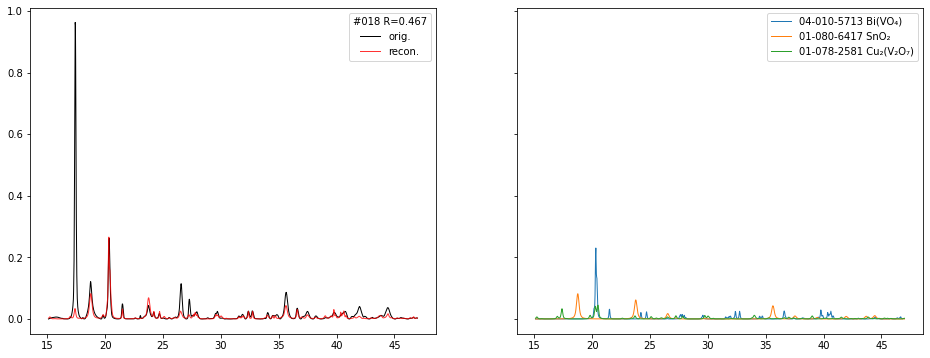

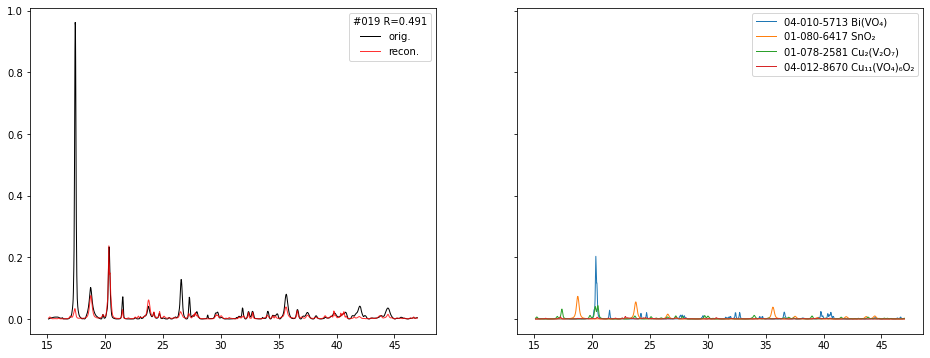

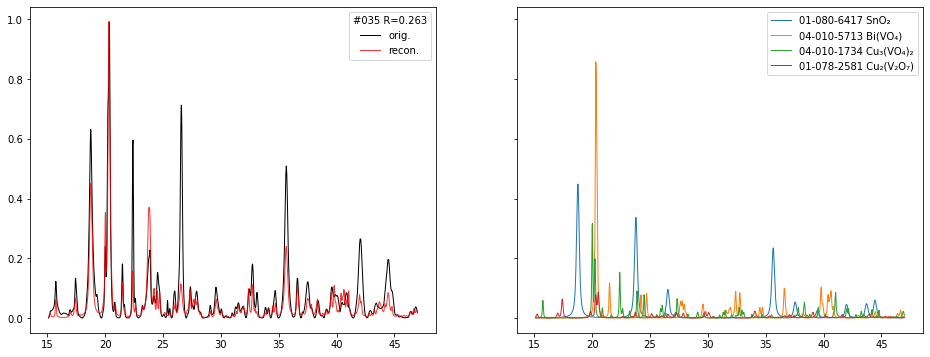

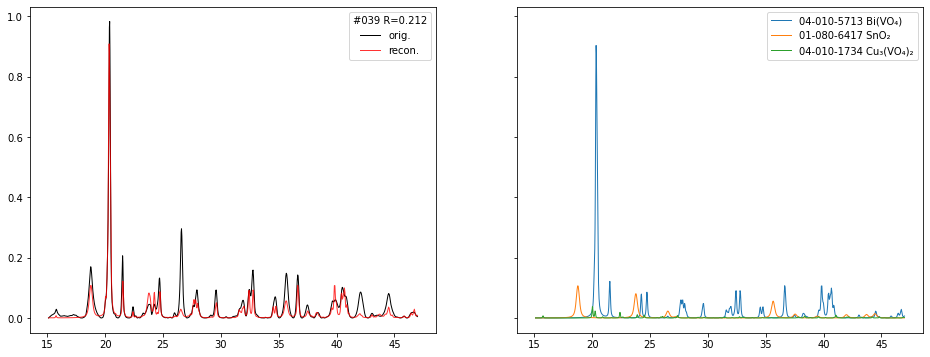

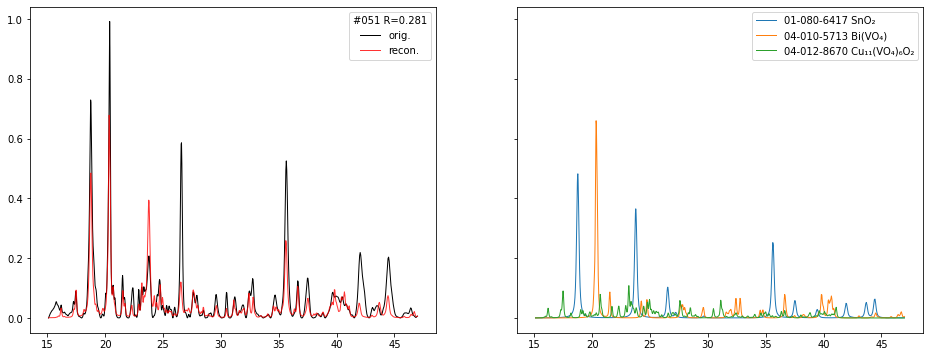

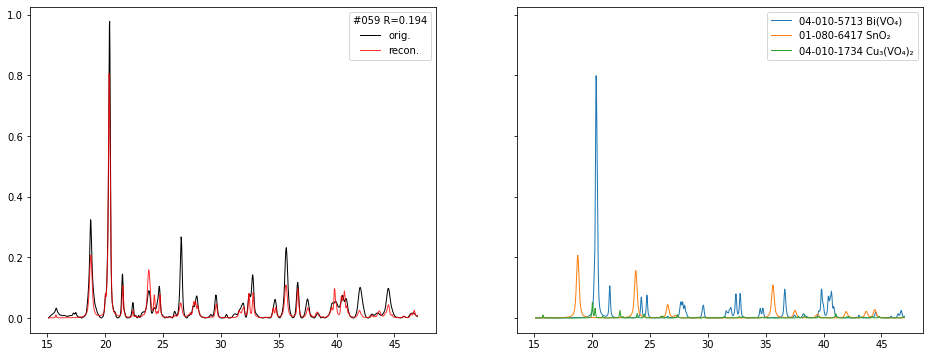

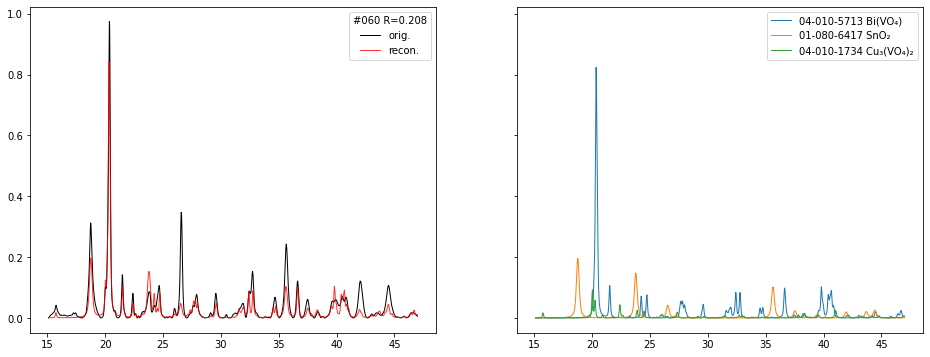

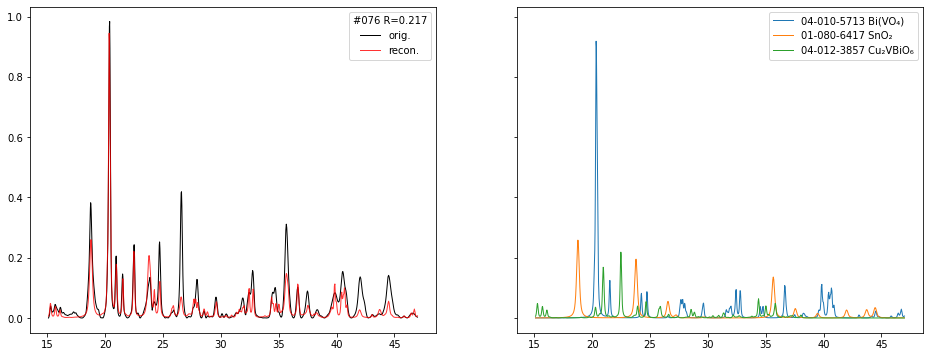

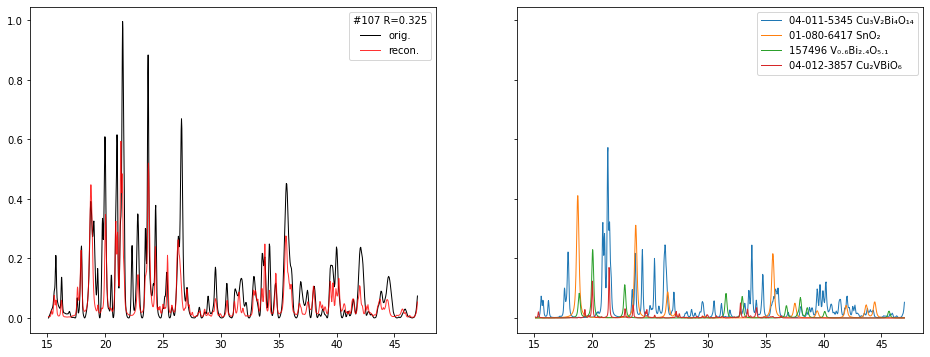

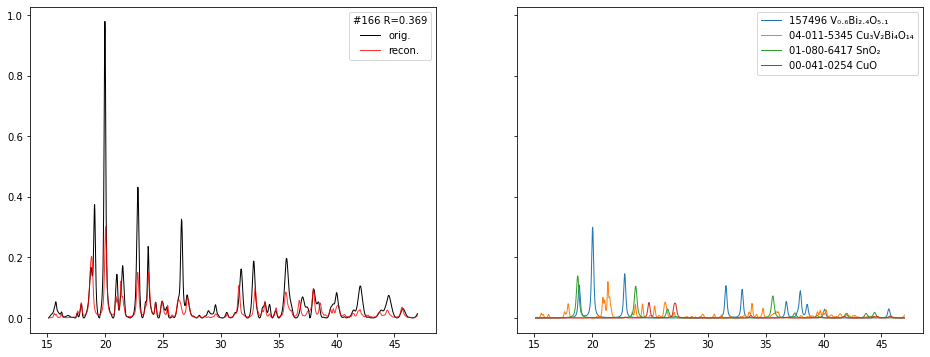

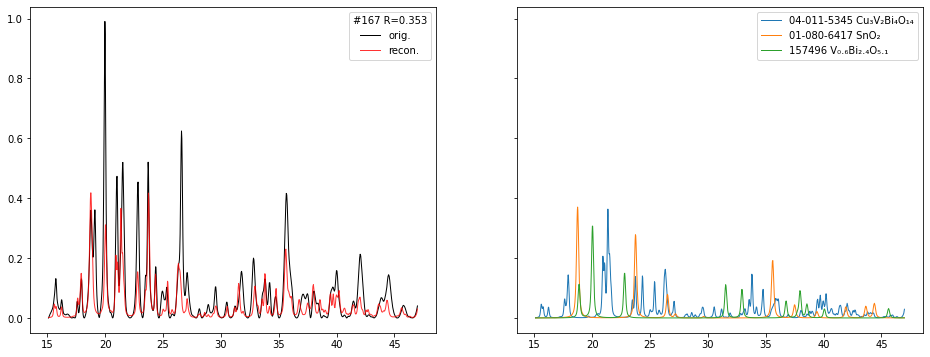

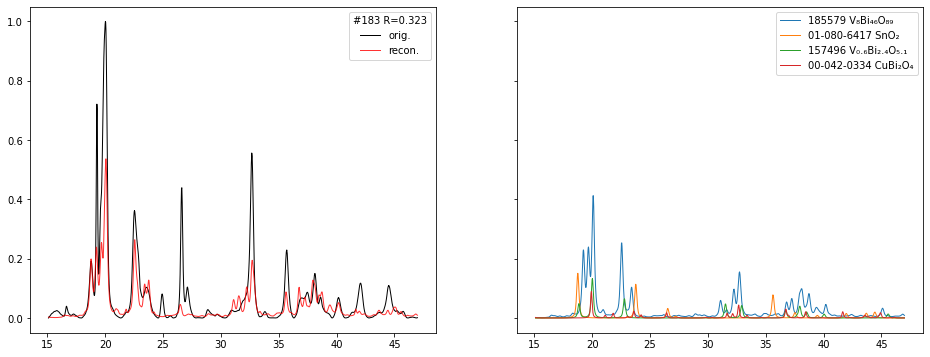

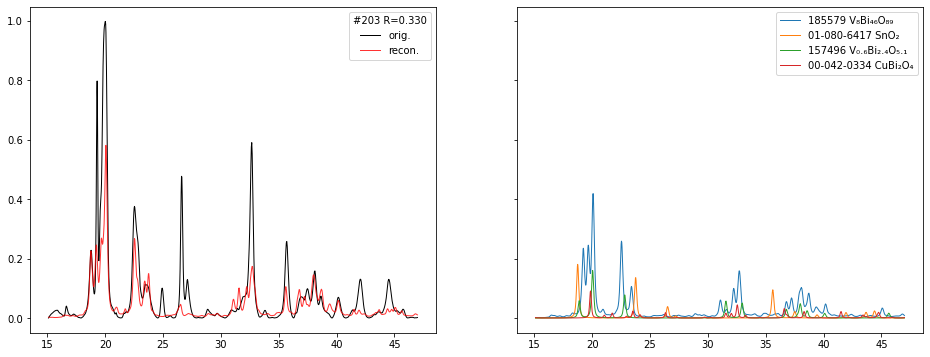

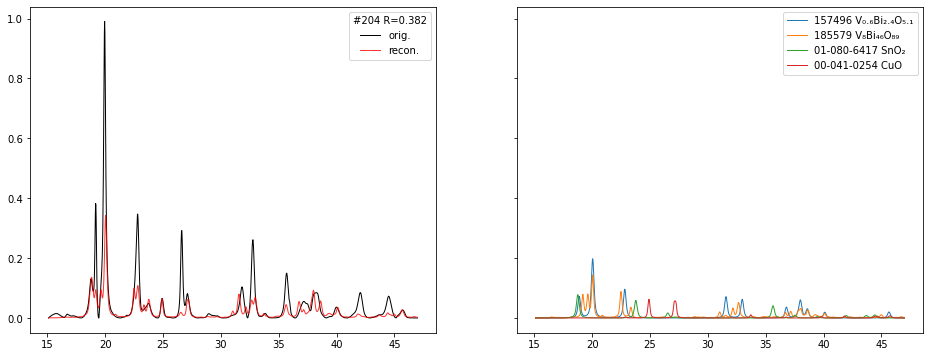

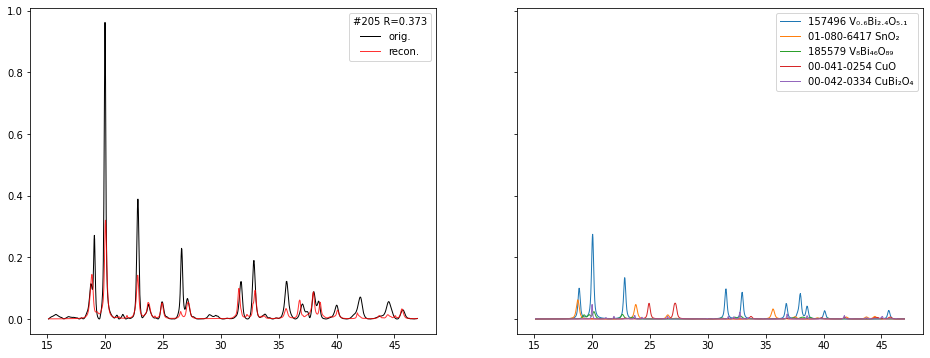

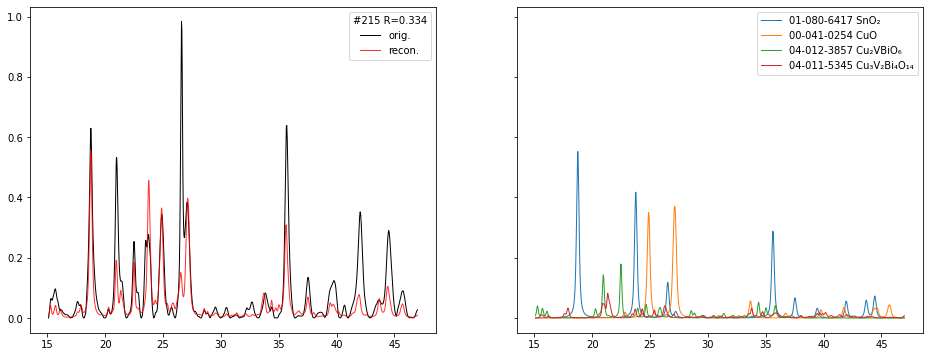

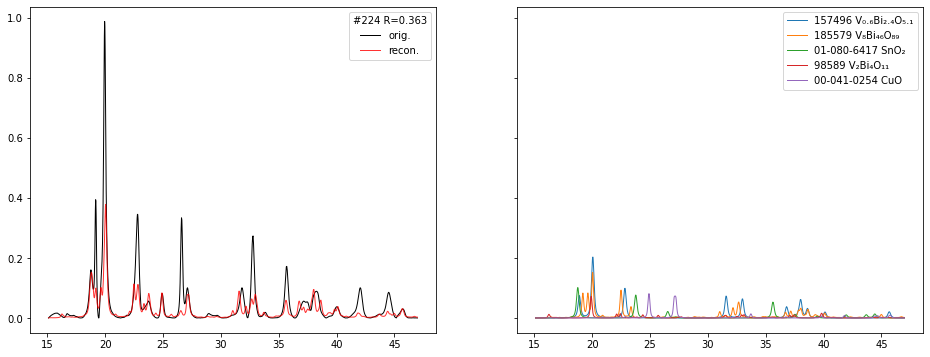

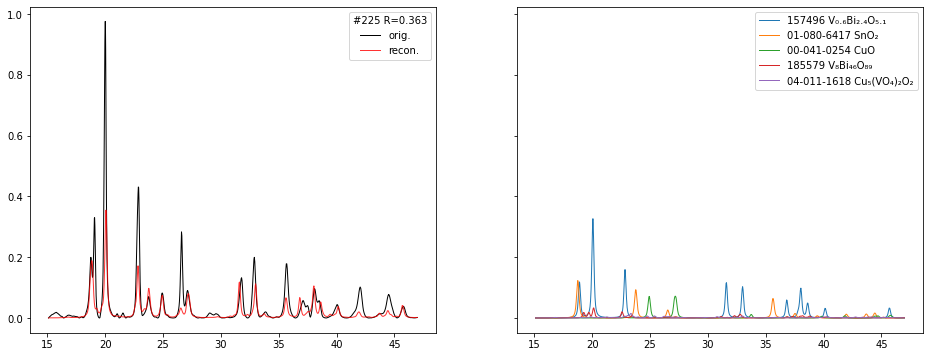

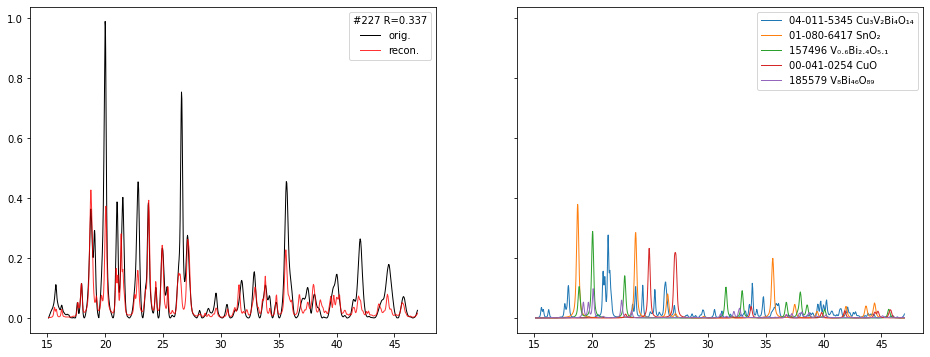

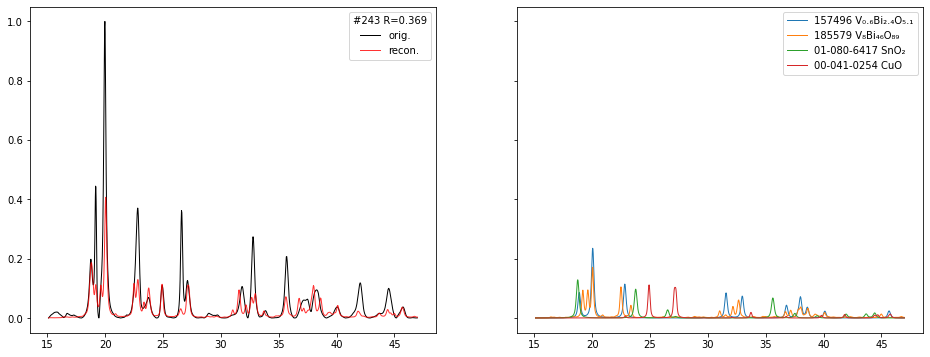

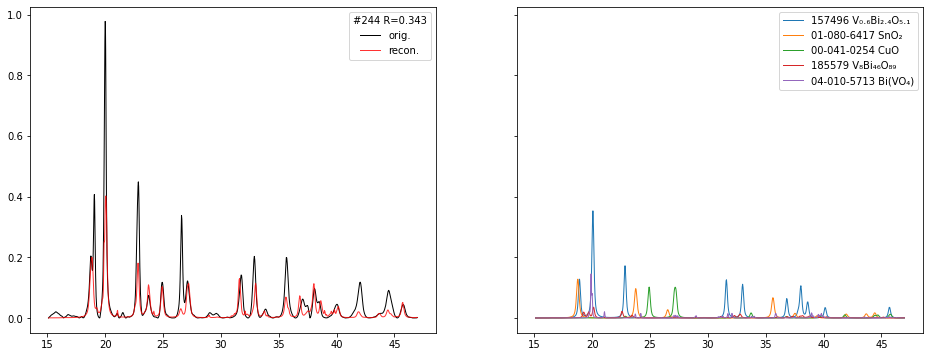

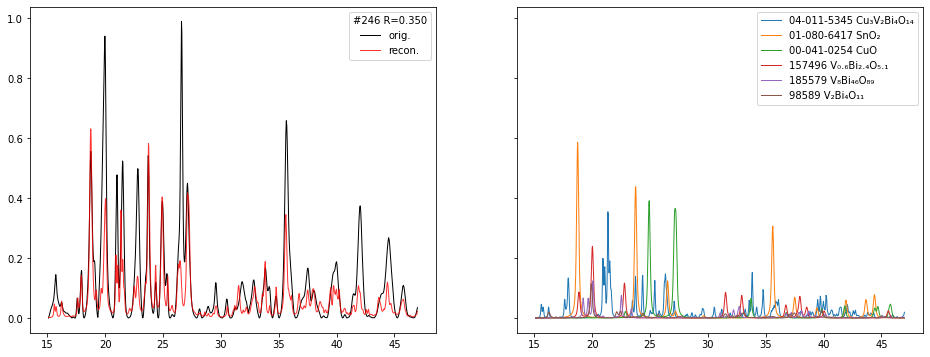

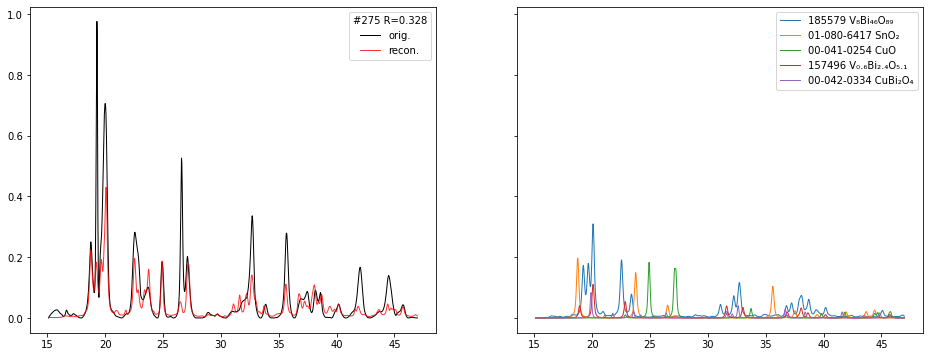

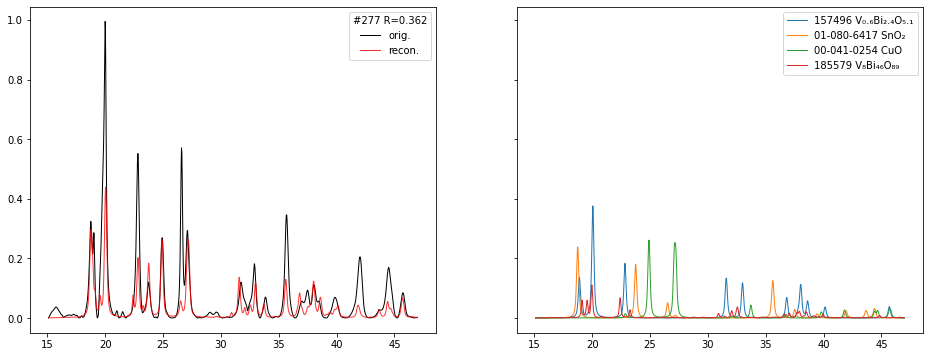

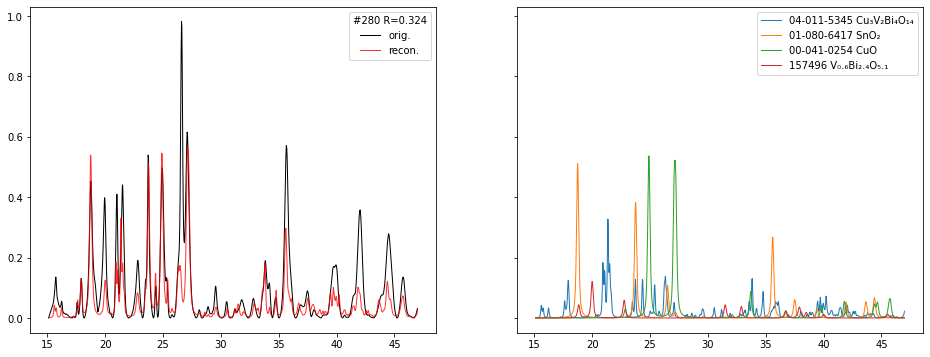

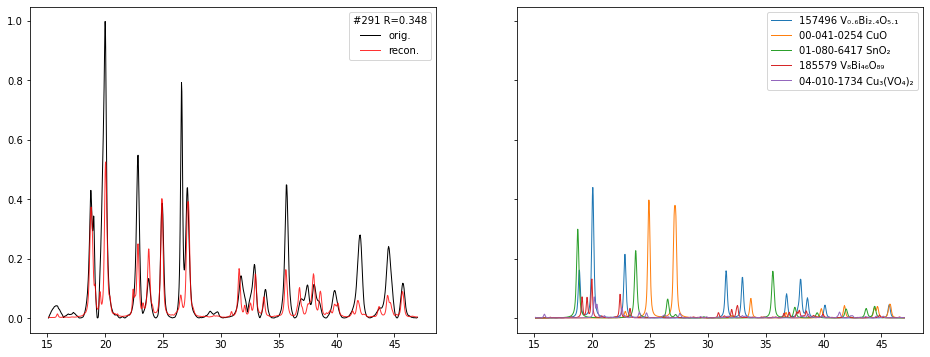

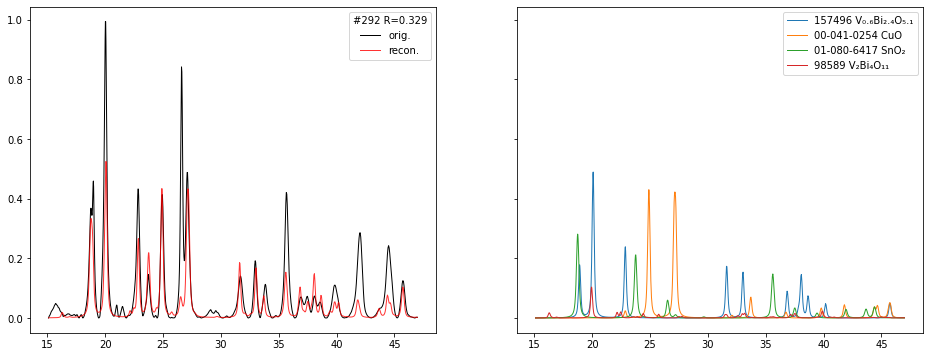

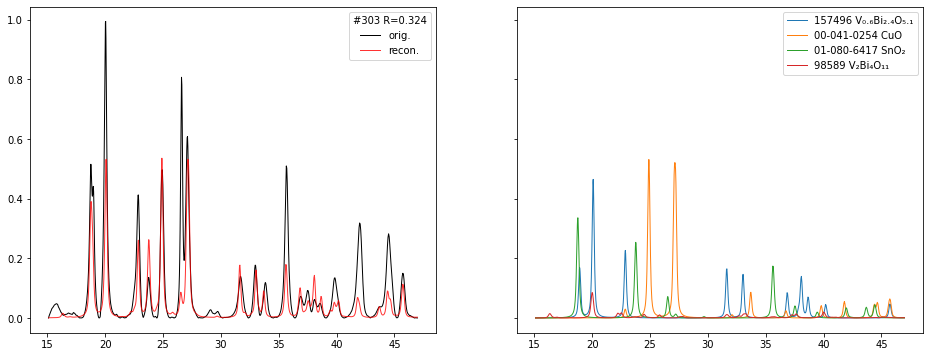

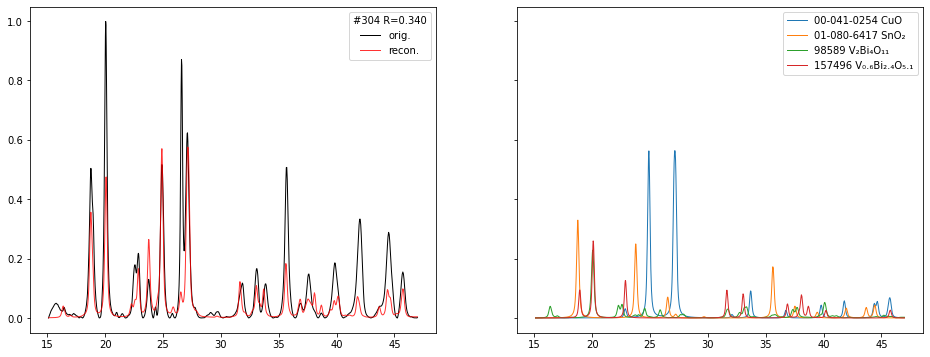

In [180]:

for sample in new_samples:  
    
    candidate_entries = []
    for i in nn_list[sample.sample_id]:
        candidate_entries += new_samples[i].entries
    
    counter = Counter(candidate_entries)
#     print(counter)
    filtered_elements = [element for element, count in counter.items() if count < 3]
#     print(filtered_elements)
    solution = []
    update_entries = []
    for i in range(len(filtered_elements)):
        for j in range(len(sample.entries)):
            
            if filtered_elements[i].entry_id == sample.entries[j].entry_id: 
                solution = [sample.solution[k] for k in range(len(sample.solution)) 
                           if sample.solution[k].entry.entry_id != sample.entries[j].entry_id]
#                 update_entries = [sample.entries[k] for k in range(len(sample.entries))
#                                      if sample.entries[k].entry_id != sample.entries[j].entry_id] 
#     print(len(update_entries))


    if len(solution) != 0:    
        sample.print_solution()
        new_sample = deepcopy(sample)
        new_sample.solution = solution 
        
#         for e in update_entries:
#             phase = Phase.from_entry_and_instance_data(e, 1 / len(update_entries), instance_data)
#             solution.append(phase)
#         new_sample = deepcopy(sample)
#         new_sample.solution = solution 
#         new_sample.refine_all_fractions()
#         new_sample.refine_one_by_one() 
        new_sample.plot(perphase=True)
        new_sample.print_solution()
    else:
        new_sample = deepcopy(sample)
    new_samples[sample.sample_id] = new_sample

In [170]:
samples[266].solution[0].entry.entry_id

'04-011-5345'

In [172]:
samples[266].entries[0].entry_id

'04-011-5345'

In [66]:

counter = Counter(candidate_entries)
filtered_elements = [element for element, count in counter.items() if count <= 3]

In [103]:
samples[204].entries[0].entry_id

'157496'

In [131]:
solution = []
update_entries = []
for i in range(len(filtered_elements)):
    for j in range(len(samples[204].entries)):
        if filtered_elements[i].entry_id == samples[204].entries[j].entry_id:
            print(filtered_elements[i].entry_id)
            print(samples[204].entries[j].entry_id)
            
            update_entries = [samples[204].entries[k] for k in range(len(samples[204].entries))
                                 if samples[204].entries[k].entry_id != samples[204].entries[j].entry_id]

#             candidate_entries = list(set(candidate_entries))
for e in update_entries:
        phase = Phase.from_entry_and_instance_data(e, 1 / len(update_entries), instance_data)
        solution.append(phase)
        new_sample = deepcopy(samples[204])
        new_sample.solution = solution 


04-010-5713
04-010-5713


In [132]:
new_sample.refine_all_fractions()
new_sample.refine_one_by_one() 
new_sample.print_solution()

Sample: # 204
            Name     Entry_id  fraction  phase_fraction     shift     width
0      V8Bi46O89       185579  0.441521        0.000186  0.002010  0.092032
1  V0.6Bi2.4O5.1       157496  0.334818        0.048691  0.002864  0.108084
2           SnO2  01-080-6417  0.123462        0.265503  0.000441  0.104400
3            CuO  00-041-0254  0.100199        0.685619  0.001428  0.089550
Current R = 0.502277786397534


4

In [121]:
samples[204].print_solution()

Sample: # 204
            Name     Entry_id  fraction  phase_fraction     shift     width
0  V0.6Bi2.4O5.1       157496  0.351679        0.057651  0.000958  0.134549
1      V8Bi46O89       185579  0.351406        0.000167  0.002190  0.103828
2           SnO2  01-080-6417  0.132676        0.321620  0.000856  0.142317
3        Bi(VO4)  04-010-5713  0.090275        0.050055 -0.020864  0.047911
4            CuO  00-041-0254  0.073965        0.570507  0.001676  0.091480
Current R = 0.35581598700184575


5

In [67]:
for element, count in counter.items():
    print(f"元素 {element} 出现了 {count} 次。")

元素 <phasemapy.parser.ICDDEntry object at 0x00000299F51FA308> 出现了 6 次。
元素 <phasemapy.parser.ICDDEntry object at 0x00000299F56711C8> 出现了 24 次。
元素 <phasemapy.parser.ICDDEntry object at 0x00000299F56740C8> 出现了 24 次。
元素 <phasemapy.parser.ICDDEntry object at 0x00000299F5677088> 出现了 21 次。
元素 <phasemapy.parser.ICDDEntry object at 0x00000299F5BFBE48> 出现了 18 次。
元素 <phasemapy.parser.ICDDEntry object at 0x00000299F5BFED48> 出现了 13 次。
元素 <phasemapy.parser.ICDDEntry object at 0x00000299F60C5288> 出现了 3 次。
元素 <phasemapy.parser.ICDDEntry object at 0x00000299F60EC388> 出现了 1 次。
元素 <phasemapy.parser.ICDDEntry object at 0x00000299F6544208> 出现了 3 次。
元素 <phasemapy.parser.ICDDEntry object at 0x00000299F7FA2B88> 出现了 1 次。
元素 <phasemapy.parser.ICDDEntry object at 0x00000299F85D0B48> 出现了 1 次。


In [ ]:
samples_neighbor = []
for sample in new_samples:    
    if len(sample.phase_fractions)==0:
        sample.solution = new_samples[sample.sample_id-1].solution    
    candidate_entries = []
    for i in nn_list[sample.sample_id]:
        candidate_entries += new_samples[i].entries
    candidate_entries = list(set(candidate_entries))
    solution = []
    for e in candidate_entries:
        phase = Phase.from_entry_and_instance_data(e, 1 / len(candidate_entries), instance_data)
        solution.append(phase)
    new_sample = deepcopy(sample)
    new_sample.solution = solution  

In [8]:
samples[184].print_solution()

Sample: # 184
            Name     Entry_id  fraction  phase_fraction     shift     width
0  V0.6Bi2.4O5.1       157496  0.397514        0.070520  0.000737  0.143629
1      V8Bi46O89       185579  0.340166        0.000175  0.002300  0.105477
2           SnO2  01-080-6417  0.140916        0.369671  0.001202  0.140695
3            CuO  00-041-0254  0.065561        0.547250  0.001516  0.089907
4        CuBi2O4  00-042-0334  0.055844        0.012384  0.009374  0.055393
Current R = 0.37201501916228746


5

In [23]:
texture_groups = {}
# new_samples = []
sample = samples[184]
sample_copy = deepcopy(sample)
po = []
for index, solution in enumerate(sample.solution):
    if solution.entry.structure:
        sample_texture = Texture(sample_copy,TC_cutoff=1.1,fraction_cutoff=0.0,solution=solution,solution_index=index)
        if sample_texture.preferred_orientation:
            print(sample_texture.entry.name)
            print(sample_texture.preferred_orientation)
            formula = sample_texture.entry.chemical_formula
            hkl = sample_texture.preferred_orientation
            if all(isinstance(sublist, list) for sublist in hkl):
                for i in range(len(hkl)):
                    if f'{formula}_{hkl[i]}' in texture_groups.keys():
                        texture_group_one = texture_groups[f'{formula}_{hkl[i]}']
                    else:
                        texture_group_one = sample_texture.get_texture_group(preferred_orientation=hkl[i])
                        texture_groups[f'{formula}_{hkl[i]}'] = texture_group_one
                          
            else:
                if f'{formula}_{hkl}' in texture_groups.keys():
                    texture_group_one = texture_groups[f'{formula}_{hkl}'] 
                else:
                    texture_group_one = sample_texture.get_texture_group(preferred_orientation=hkl)
                    texture_groups[f'{formula}_{hkl}'] = texture_group_one
                          

V0.6Bi2.4O5.1
[[1, 0, 1], [1, 0, 2]]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[1, 0, 2]
[1,

In [44]:
grouped_dict = Texture.group_keys_by_prefix(texture_groups)
grouped_ls = [keys for prefix, keys in grouped_dict.items()]
combinations = list(product(*grouped_ls))
combinations = [list(combo) for combo in combinations]

<module 'matplotlib.pyplot' from 'C:\\Users\\dell\\anaconda3\\envs\\myPymatgen\\lib\\site-packages\\matplotlib\\pyplot.py'>

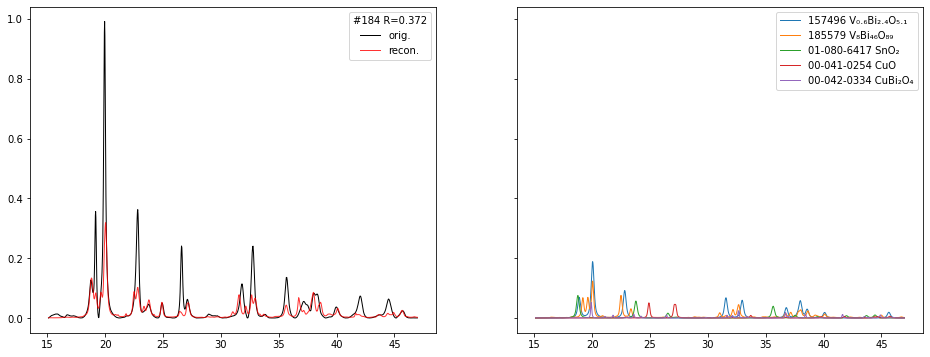

In [45]:
sample.plot(perphase=True)

In [ ]:
new_sample = deepcopy(sample)
new_sample.solution[self.entry_index].entry.data['xrd'] = entry_texture.data['xrd']
# new_sample = new_sample.optimize(num_epoch=50, print_prog=True, loss_weight=loss_weight)
# new_sample.update_solution(0.001, 0.2999, new_sample.max_q_shift)
new_sample.refine_all_fractions()
new_sample.refine_one_by_one()
R_list.append(new_sample.R_part)

new_sample.plot(perphase=True)

In [13]:
texture_groups = {}
# new_samples = []
sample = samples[242]
sample_copy = deepcopy(sample)
for index, solution in enumerate(sample.solution):
    if solution.entry.structure:
        sample_texture = Texture(sample_copy,TC_cutoff=1.1,fraction_cutoff=0.0,solution=solution,solution_index=index)

        if sample_texture.preferred_orientation:
            print(sample_texture.entry.name)
            print(sample_texture.preferred_orientation)
            print(index)
            if f'{sample_texture.entry.chemical_formula}_{sample_texture.preferred_orientation}' in texture_groups.keys():
                texture_group_one = texture_groups[f'{sample_texture.entry.chemical_formula}_{sample_texture.preferred_orientation}']
            else:
                texture_group_one = sample_texture.get_texture_group()
                texture_groups[f'{sample_texture.entry.chemical_formula}_{sample_texture.preferred_orientation}'] = texture_group_one
                              
#             sample_dup = sample_texture.optimize_by_texture(texture_group_one,plot=True) 
#             sample_copy = deepcopy(sample_dup)

V8Bi46O89
[3, 3, 1]
0
SnO2
[2, 0, 0]
1
V0.6Bi2.4O5.1
[1, 0, 1]
2
CuO
[0, 0, 2]
3


In [27]:
 texture_groups['SnO2_[2, 0, 0]'][48].data['xrd']

[array([18.748565, 23.754164, 26.514909, 27.203175, 29.644383, 35.599247,
        37.49748 , 39.421415, 41.923225, 42.362652, 43.652764, 44.388669,
        46.326129, 47.508741, 47.799914, 49.323476, 51.704622, 53.02914 ,
        54.406818, 54.661441, 56.246182, 57.546778, 58.106554, 59.288808,
        60.599853, 62.033361, 62.479494, 66.076885, 66.146934, 67.393783,
        67.599629, 68.685197, 69.155031, 71.198131, 71.262994, 74.063956,
        74.995021, 76.035881, 77.303022, 77.541887, 78.254195]),
 array([1.      , 0.746169, 0.224106, 0.034181, 0.013363, 0.541687,
        0.123   , 0.057373, 0.109974, 0.00198 , 0.106045, 0.141886,
        0.001022, 0.050138, 0.001018, 0.001962, 0.075629, 0.024086,
        0.046877, 0.002083, 0.023   , 0.055886, 0.061862, 0.027753,
        0.021126, 0.00096 , 0.00102 , 0.024317, 0.042677, 0.001011,
        0.021913, 0.02266 , 0.048386, 0.03417 , 0.024577, 0.040092,
        0.008   , 0.023514, 0.011239, 0.000997, 0.032643])]

In [25]:
len(texture_groups['SnO2_[2, 0, 0]'])

49

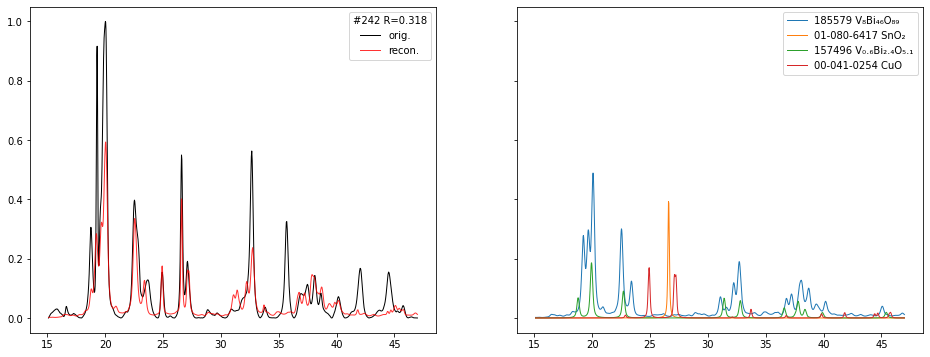

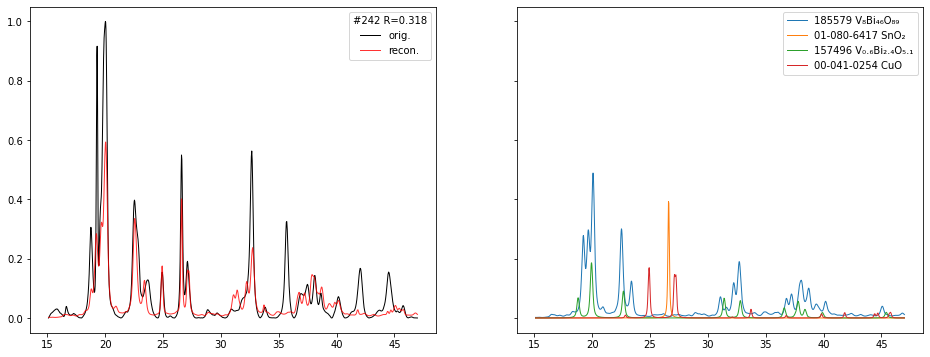

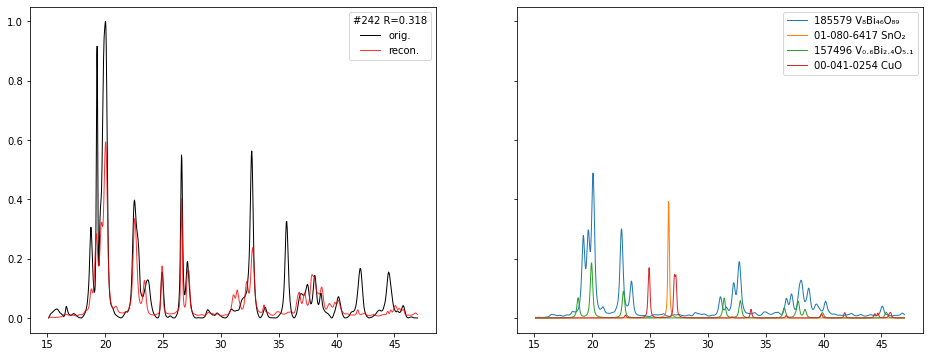

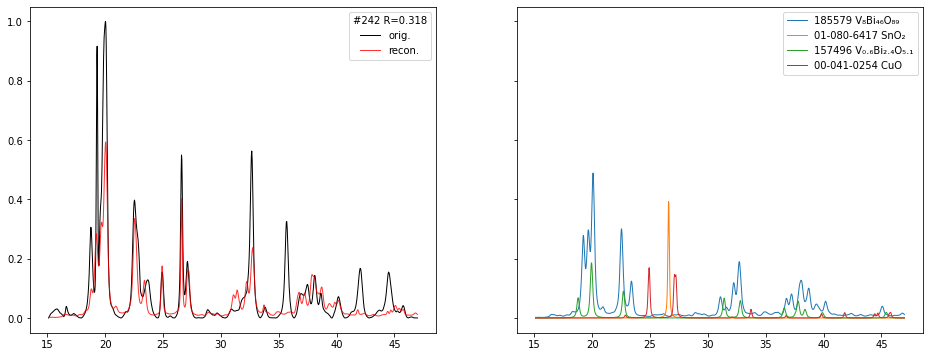

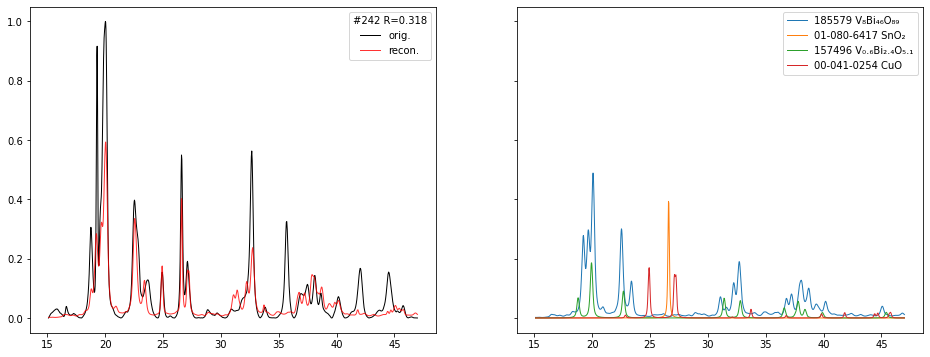

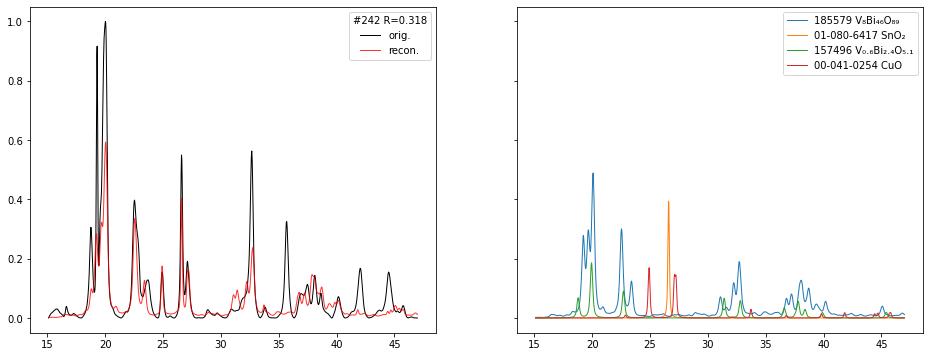

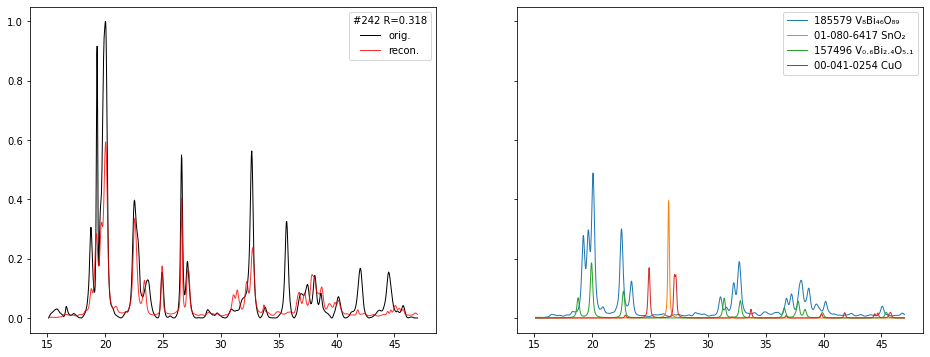

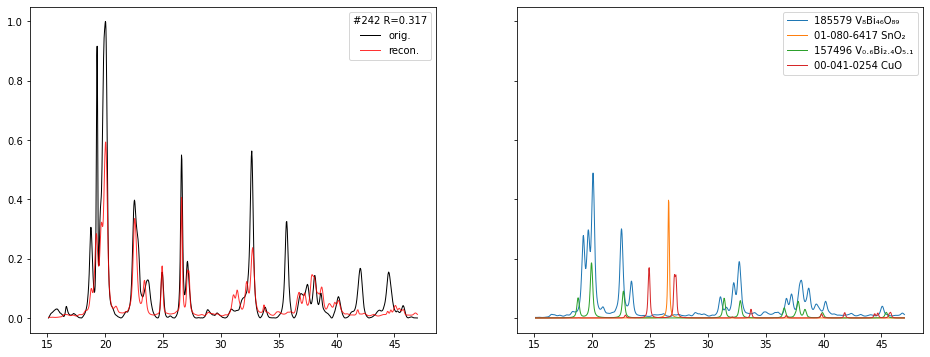

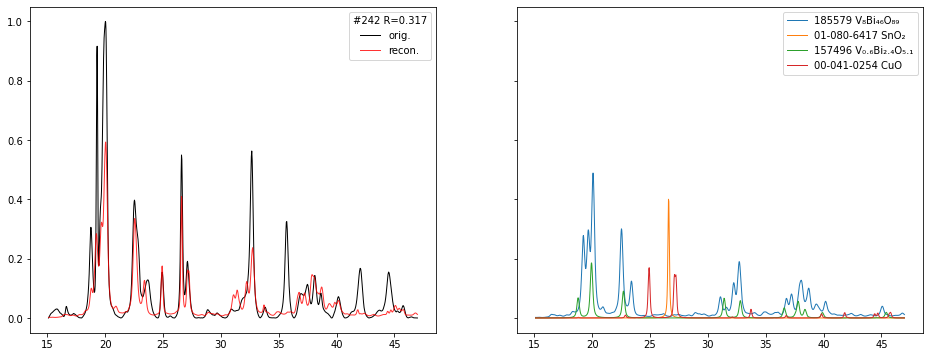

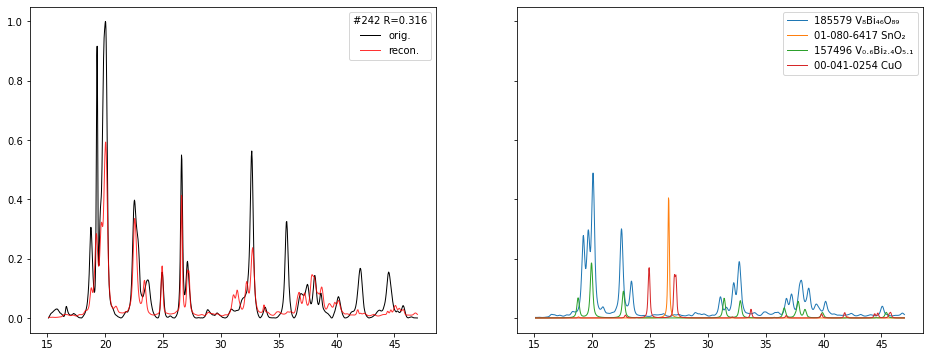

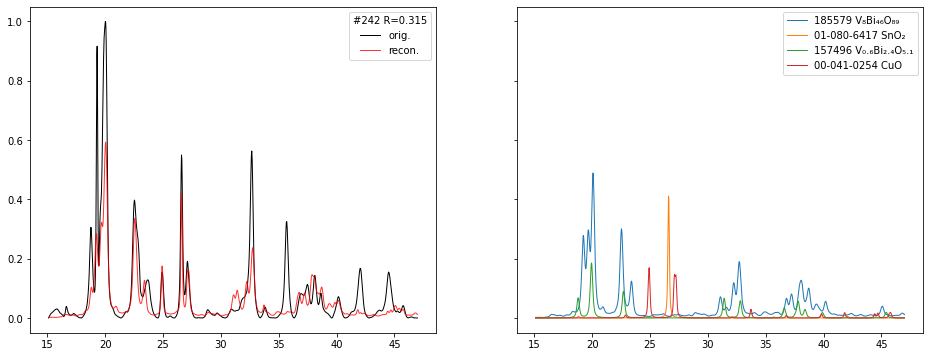

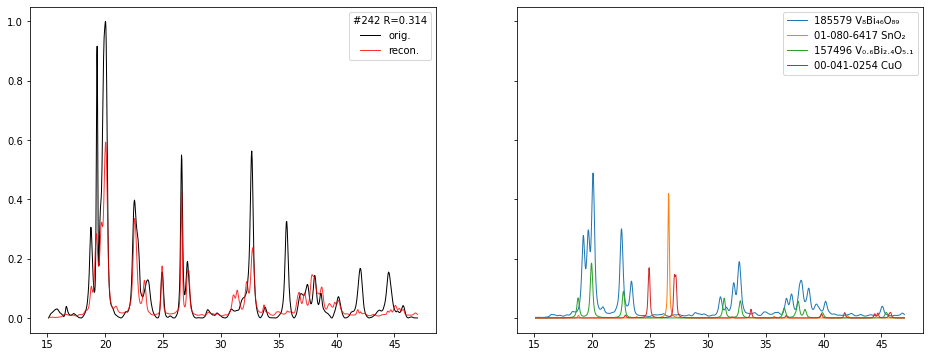

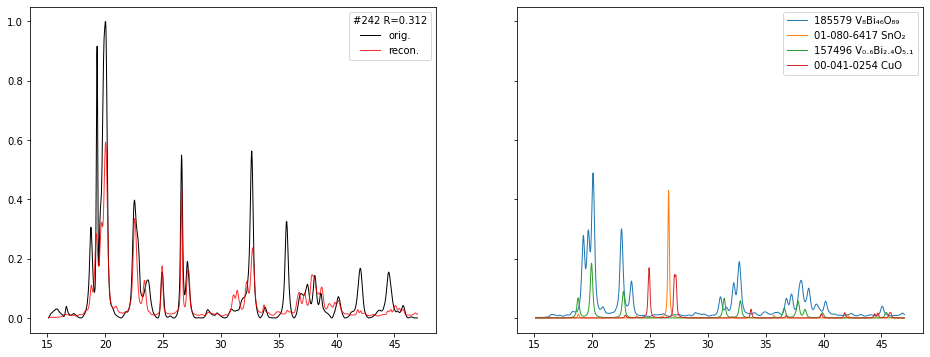

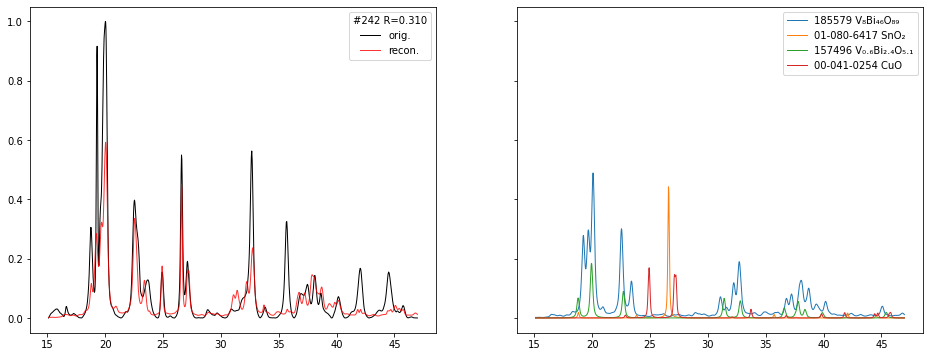

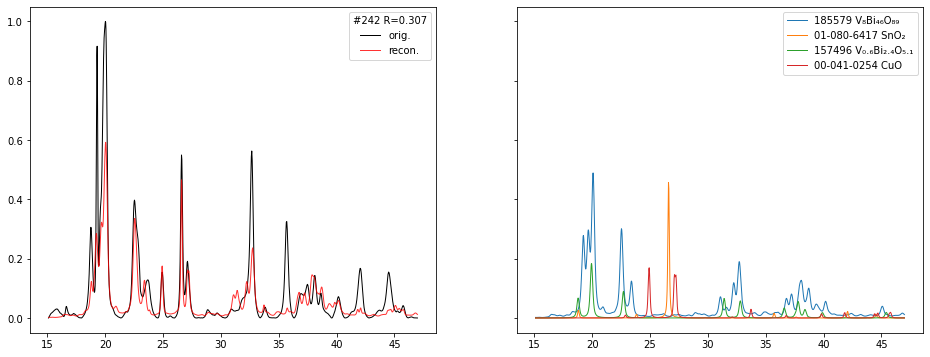

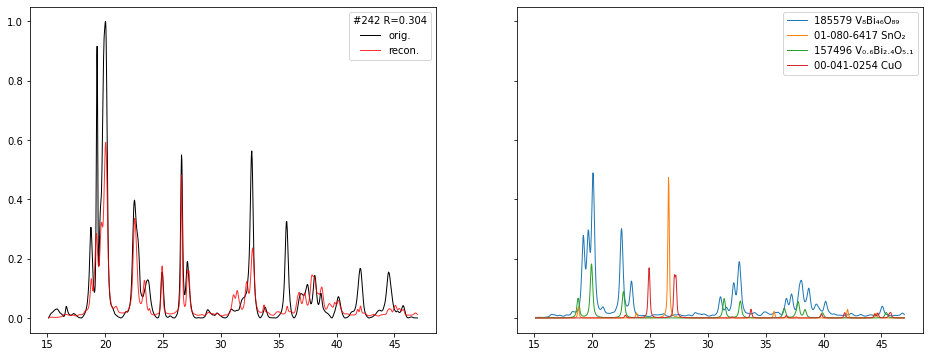

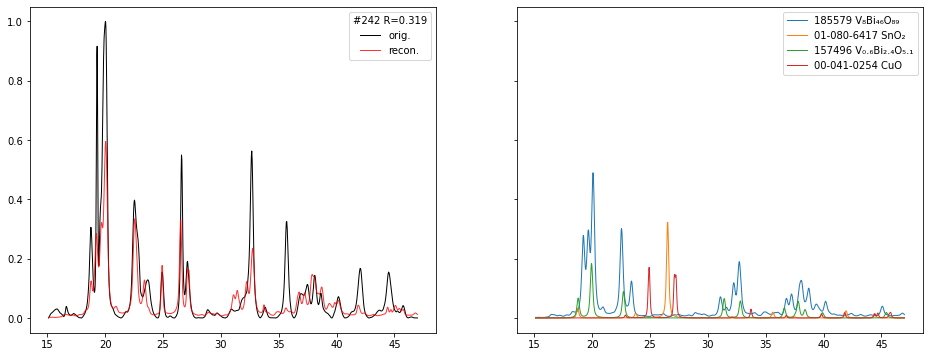

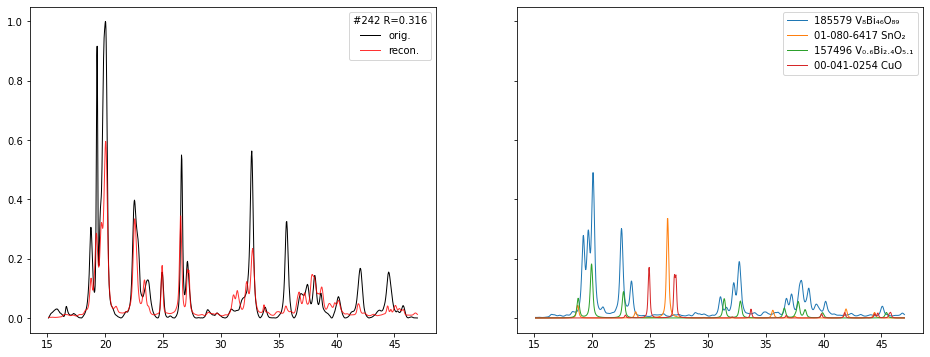

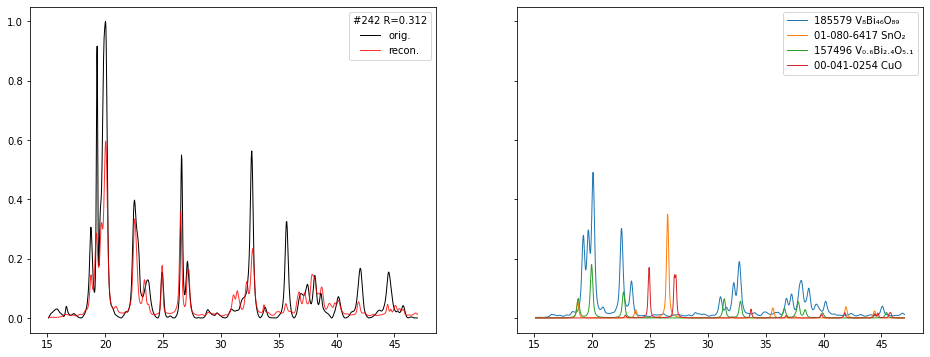

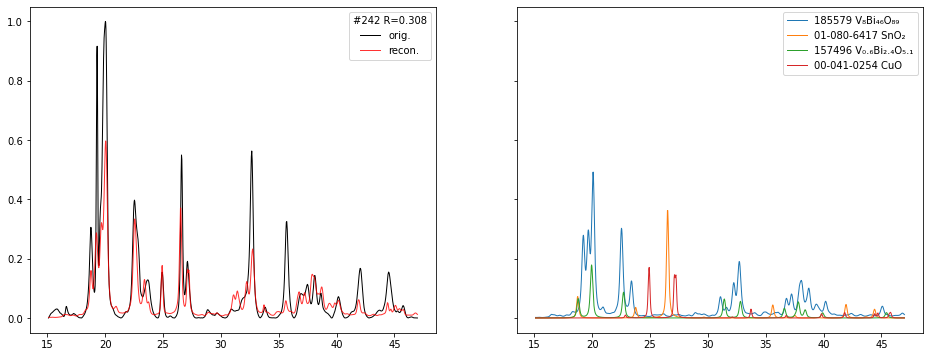

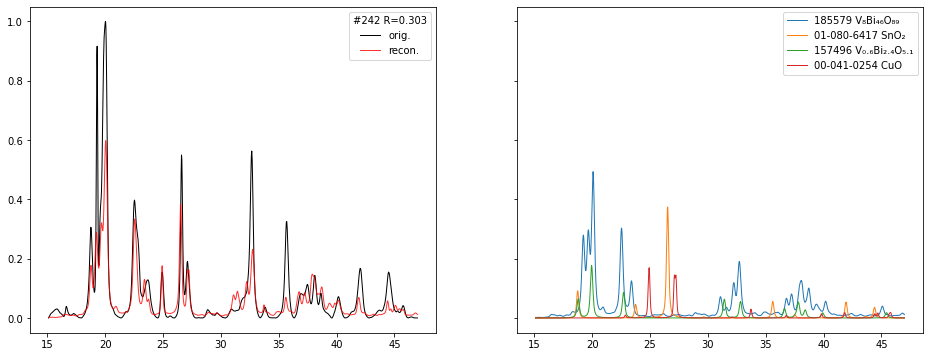

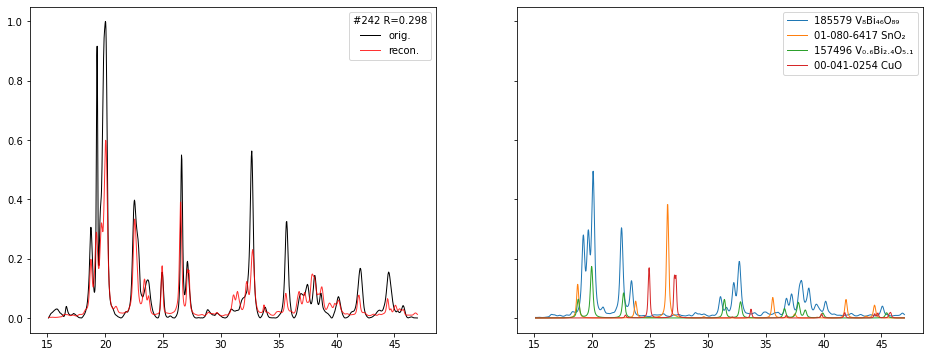

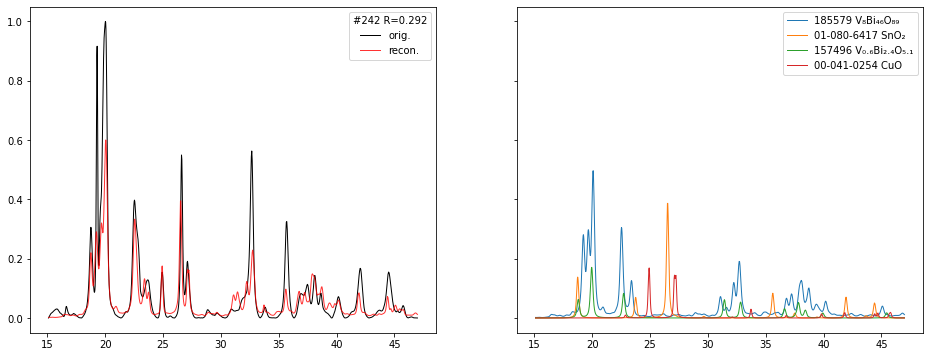

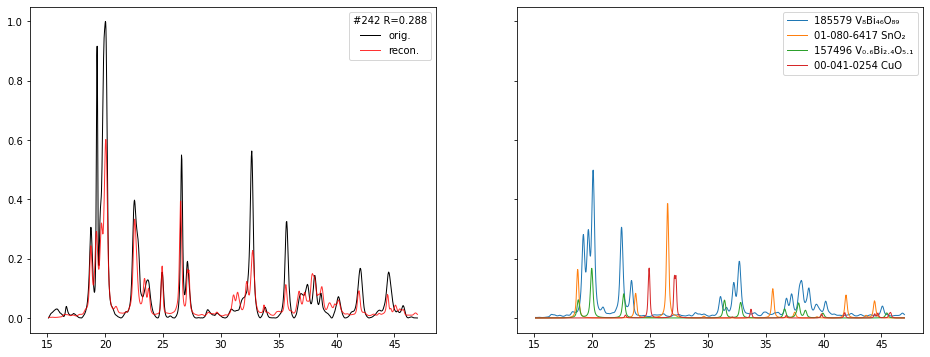

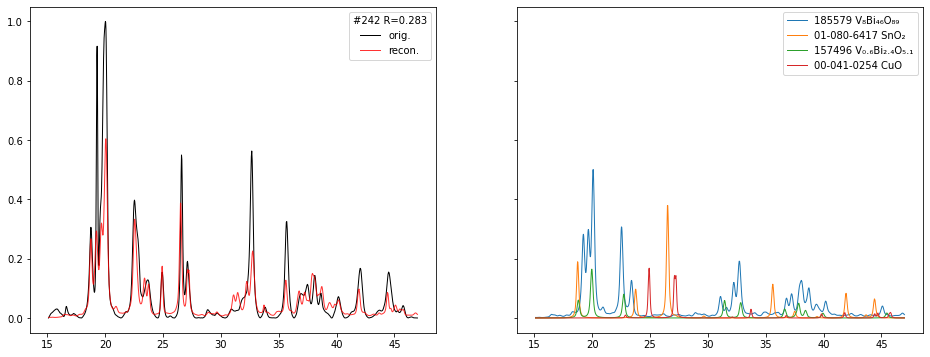

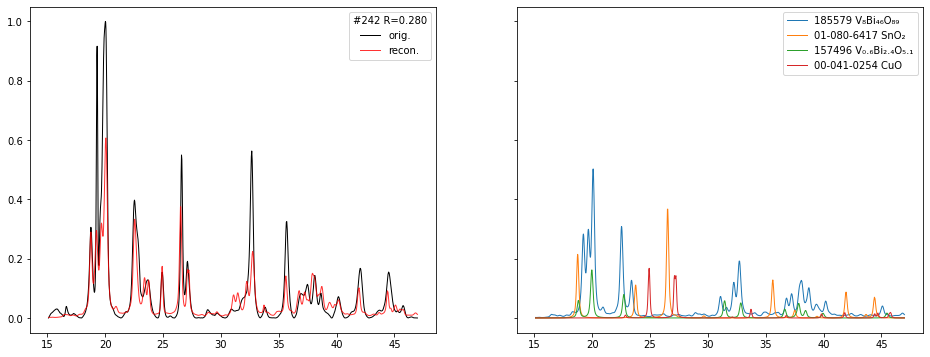

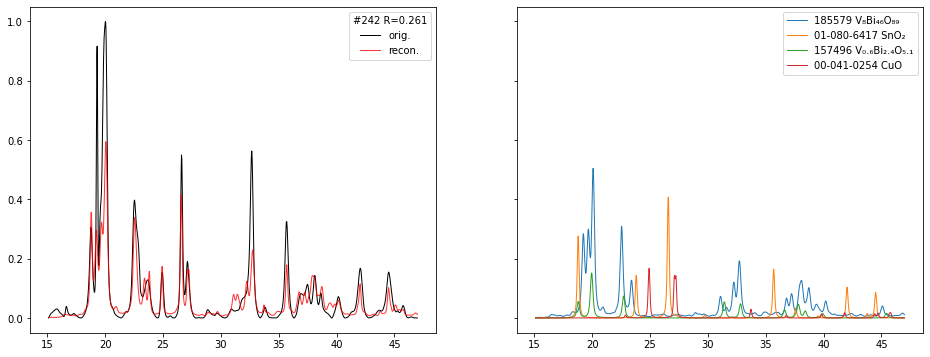

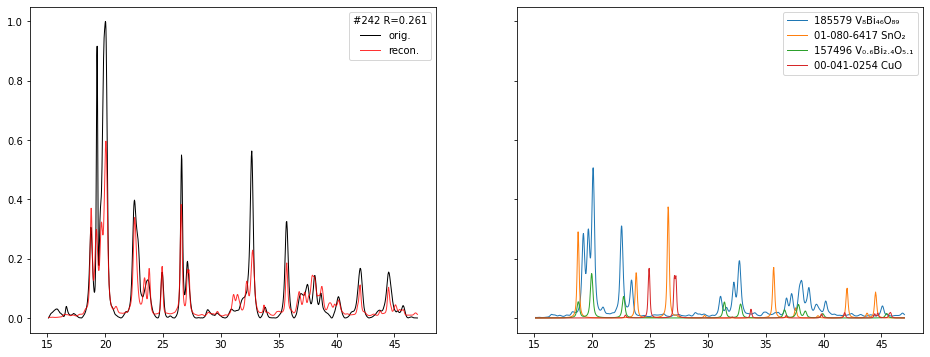

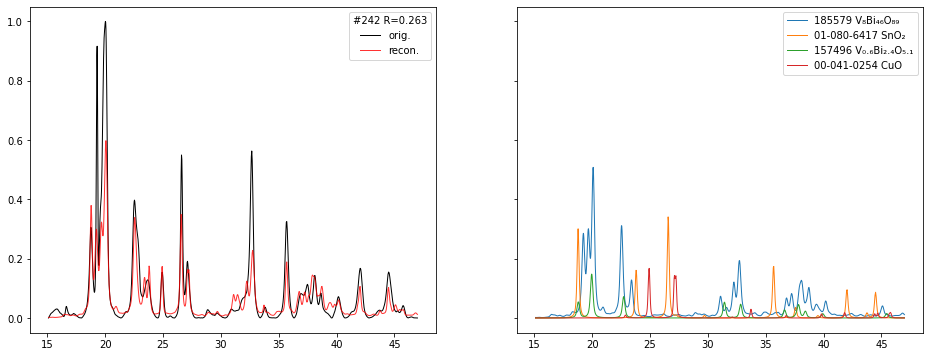

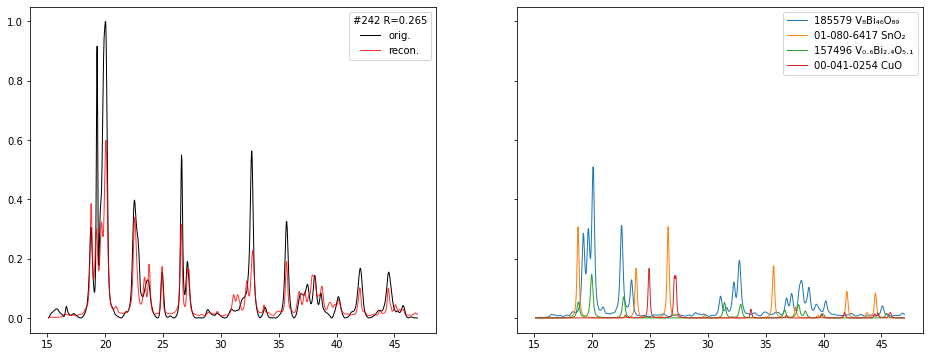

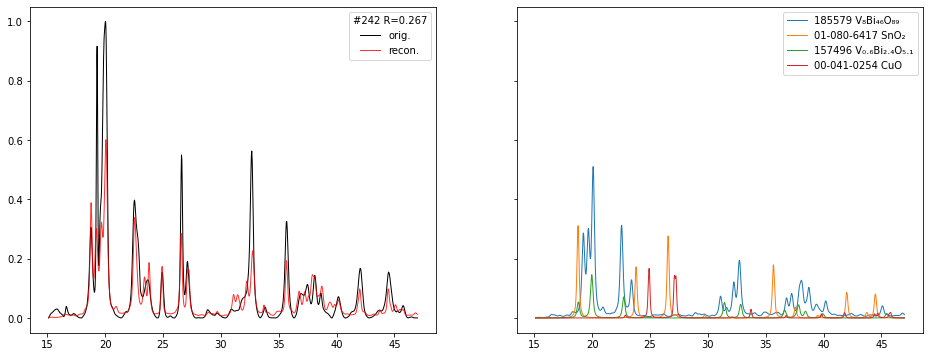

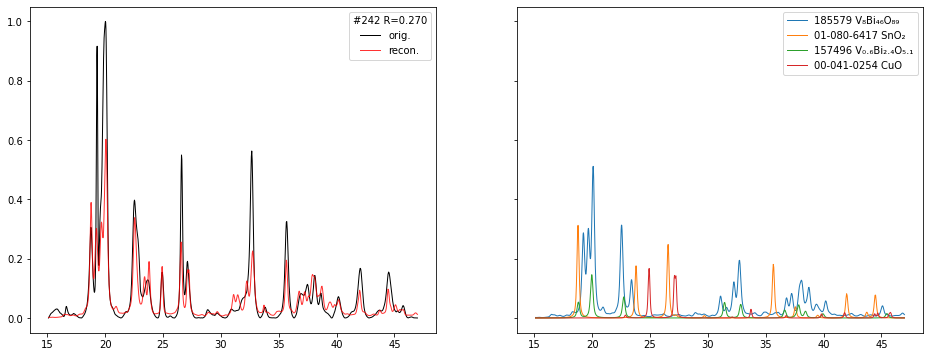

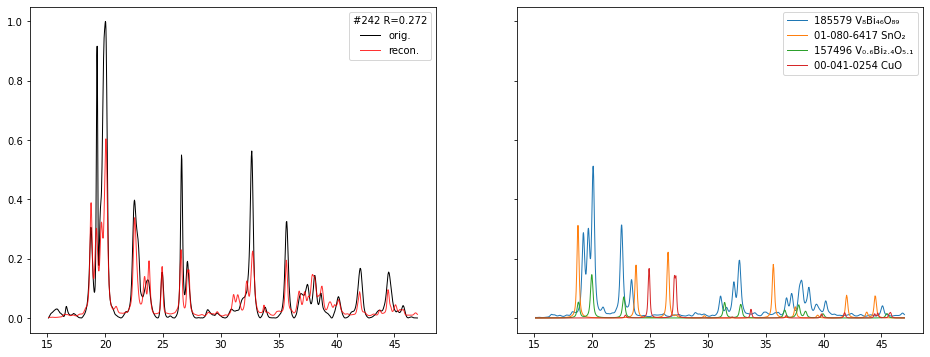

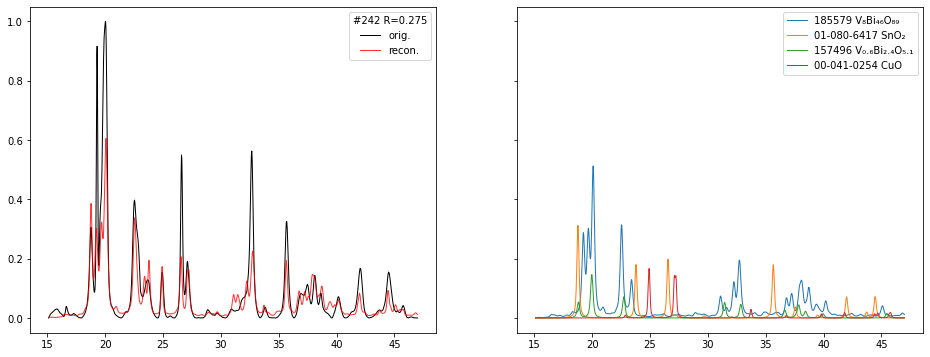

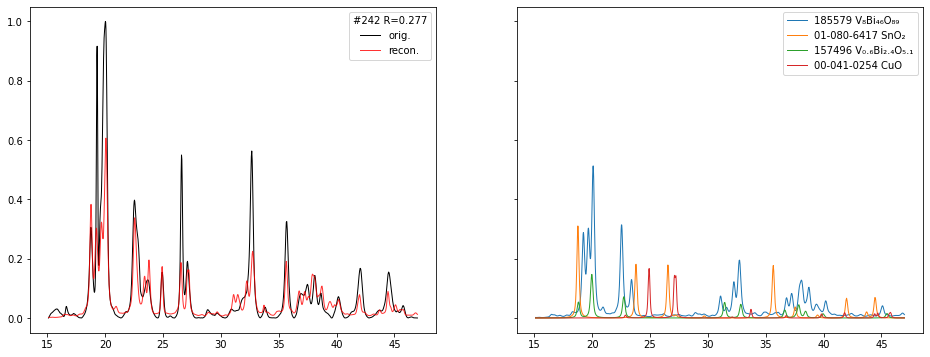

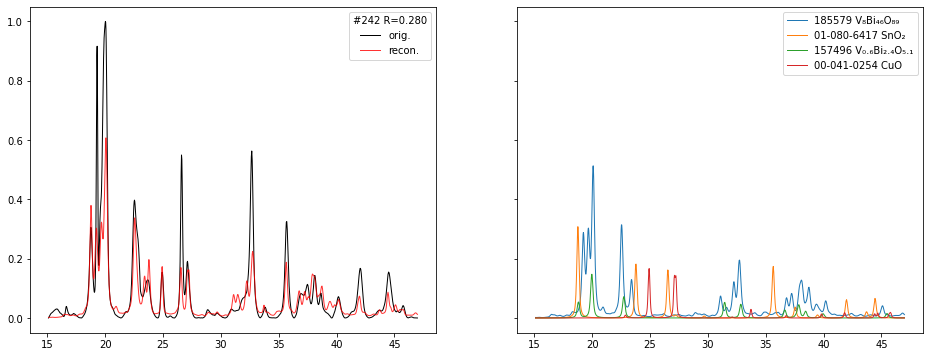

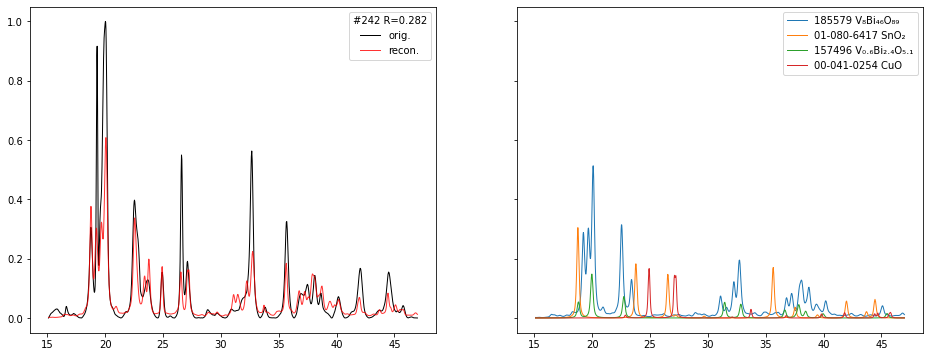

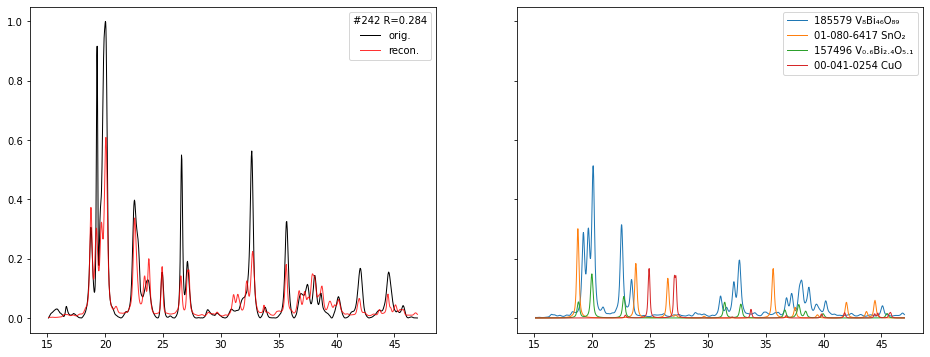

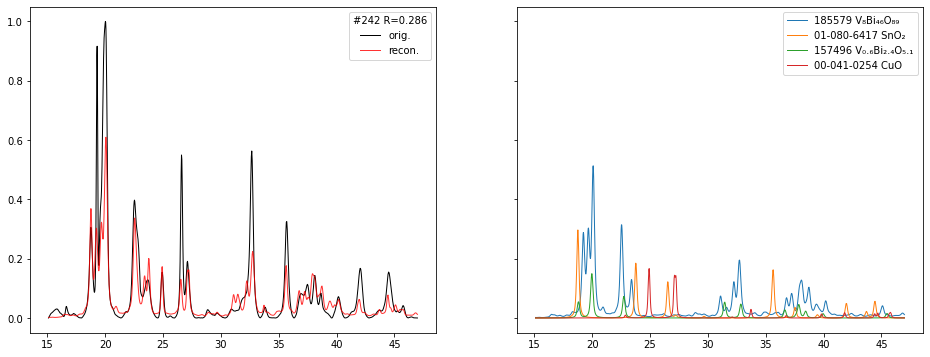

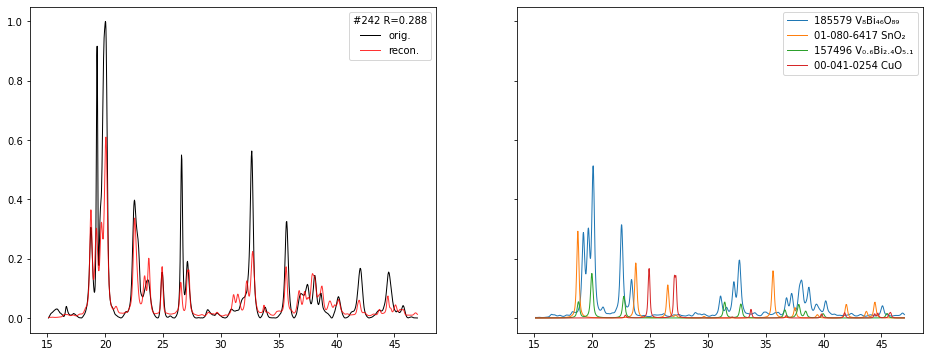

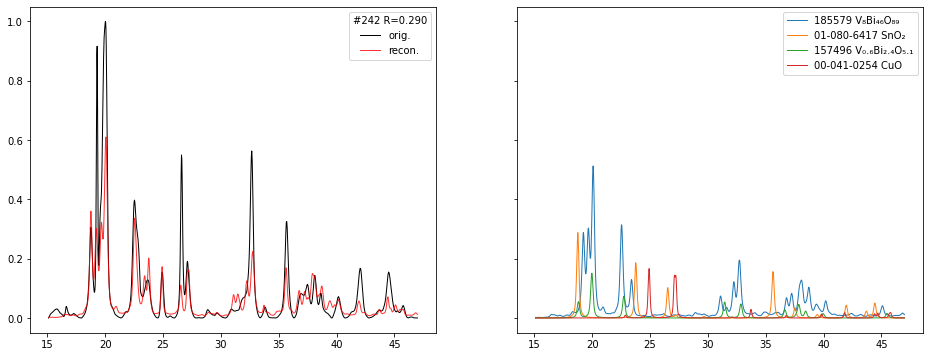

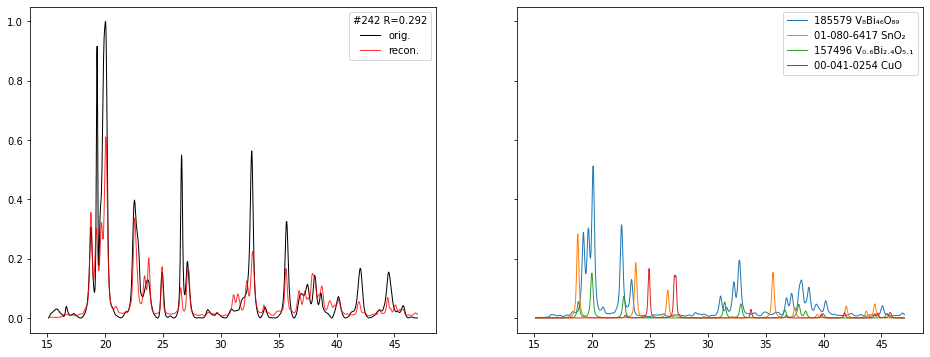

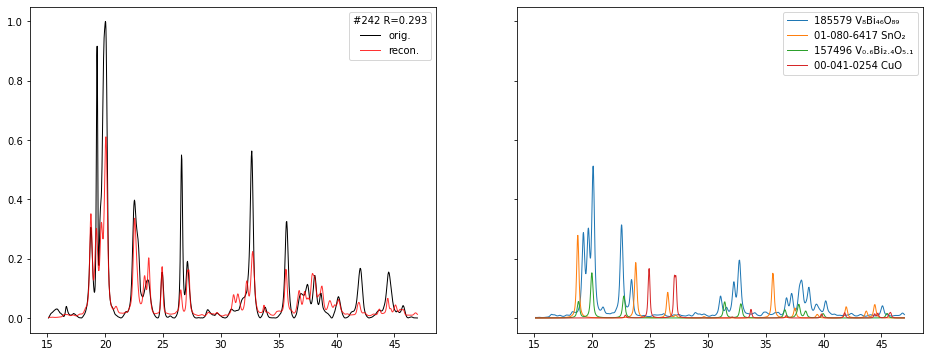

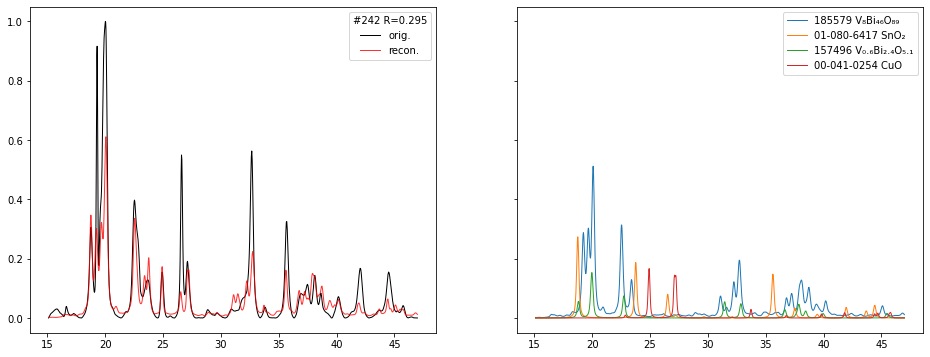

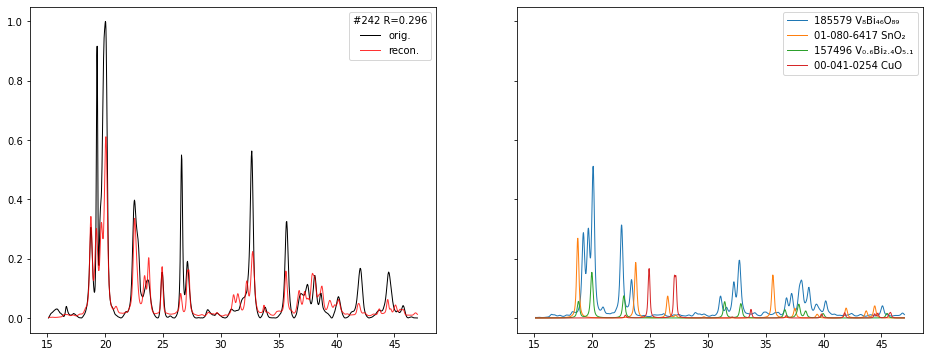

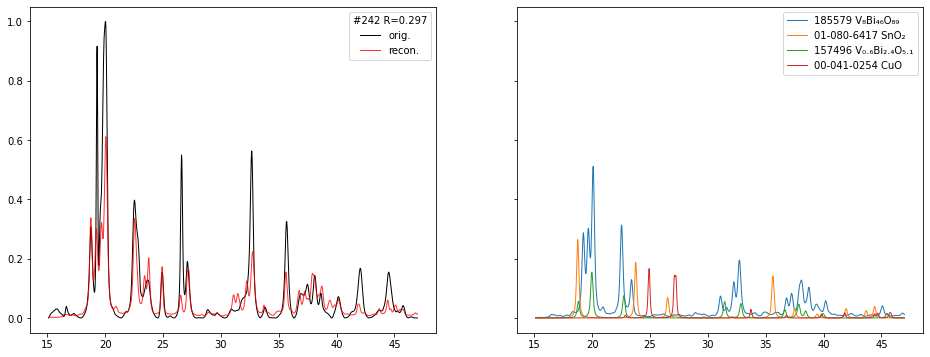

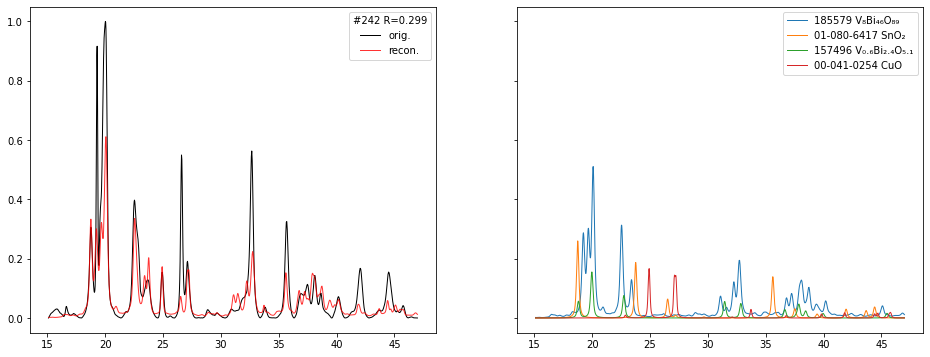

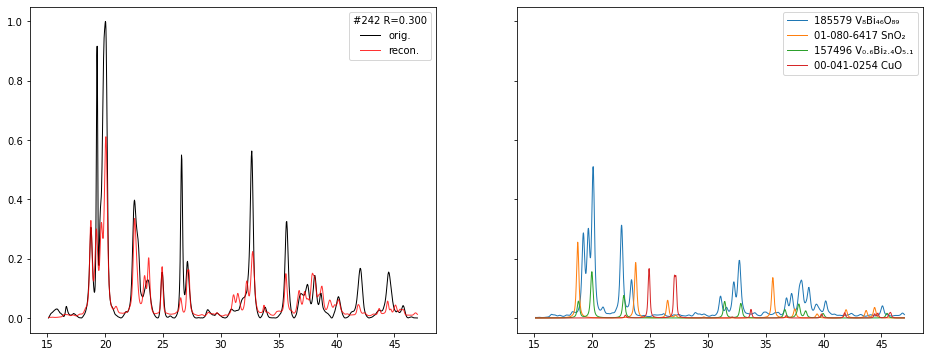

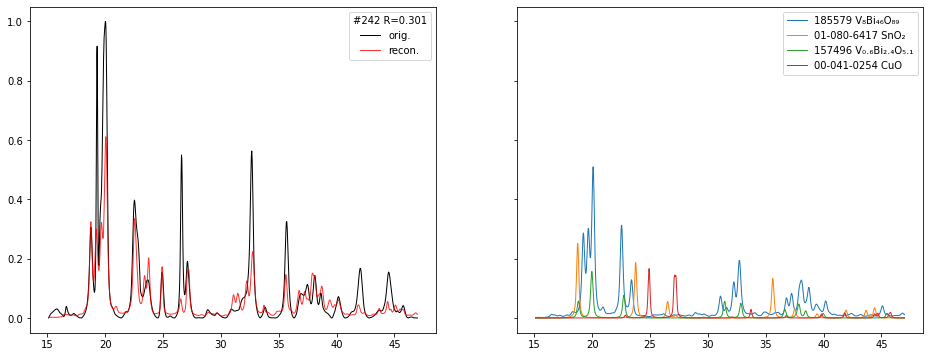

In [28]:
for i in range(len(texture_groups['SnO2_[2, 0, 0]'])):  
    new_sample = deepcopy(samples[242])
    new_sample.solution[1].entry.data['xrd'] =  texture_groups['SnO2_[2, 0, 0]'][i].data['xrd']
                # new_sample = new_sample.optimize(num_epoch=50, print_prog=True, loss_weight=loss_weight)
                # new_sample.update_solution(0.001, 0.2999, new_sample.max_q_shift)
    new_sample.refine_all_fractions()
    new_sample.refine_one_by_one()
    new_sample.plot(perphase=True)

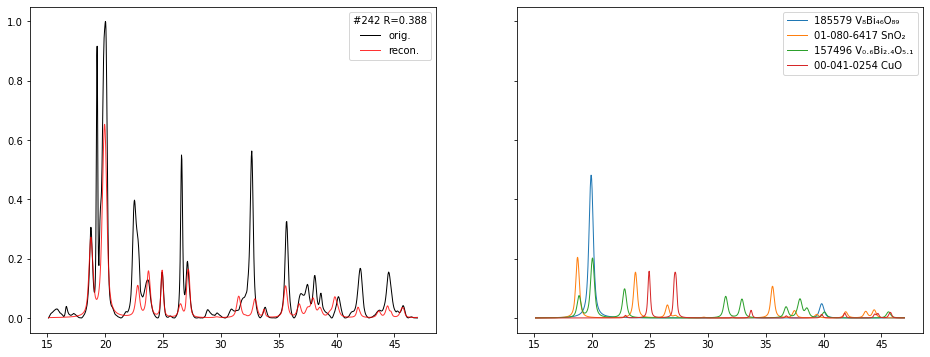

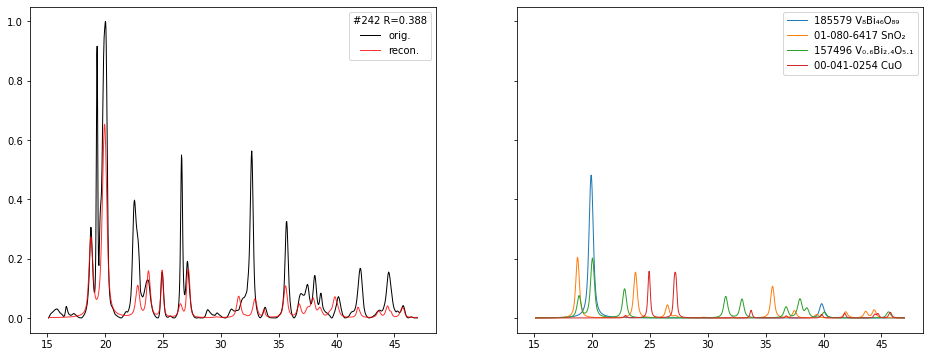

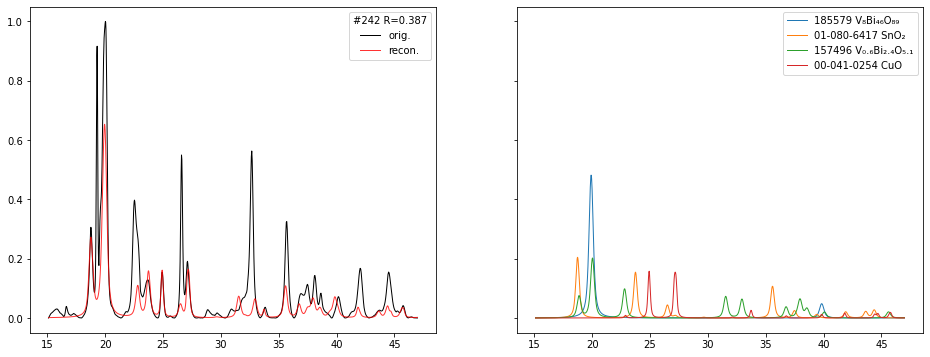

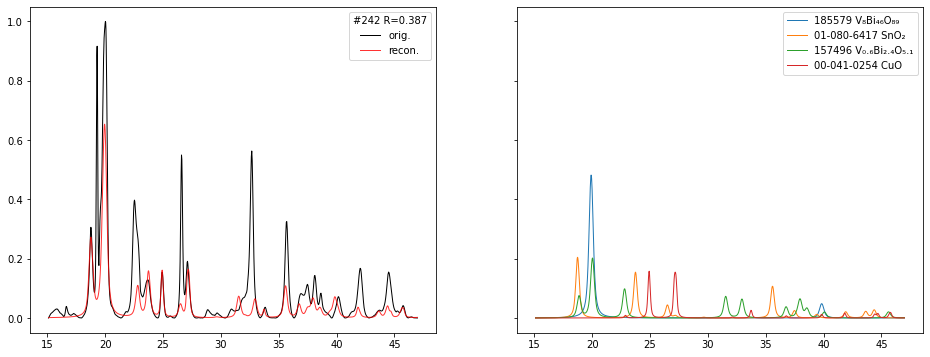

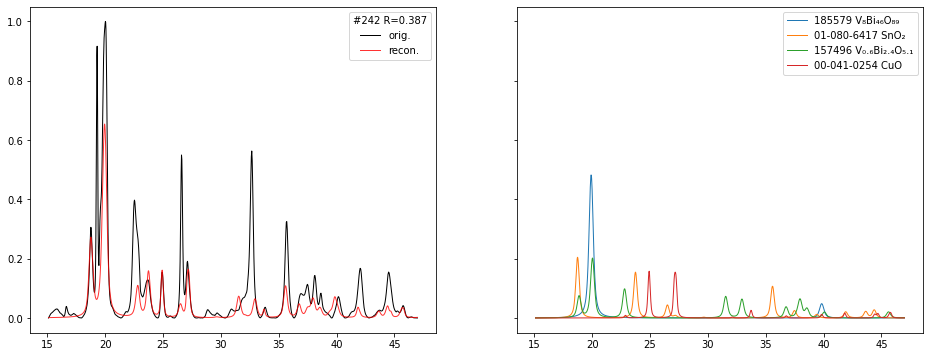

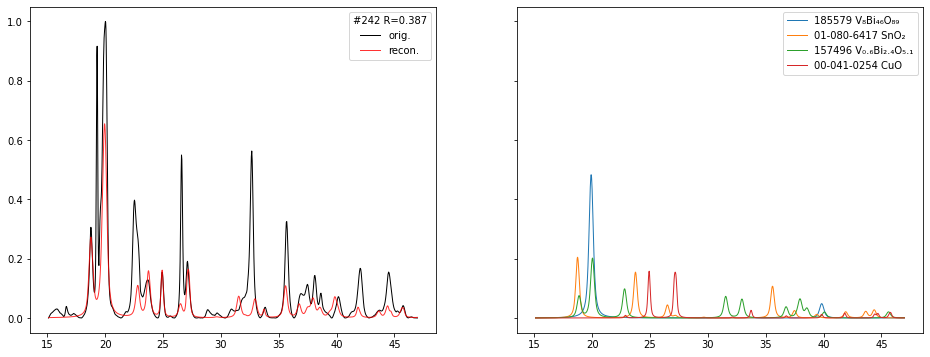

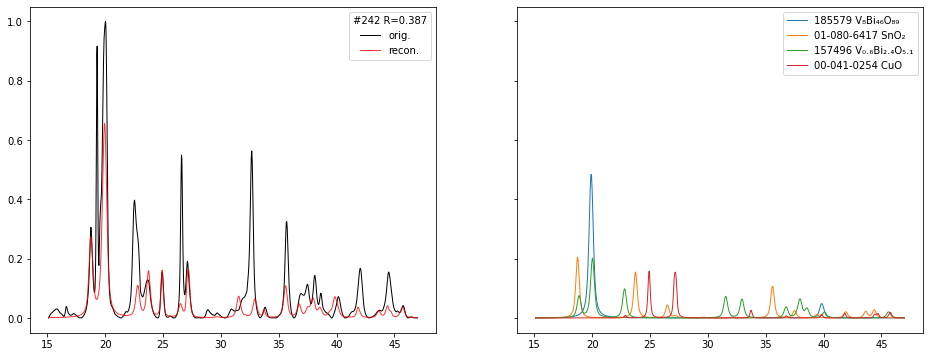

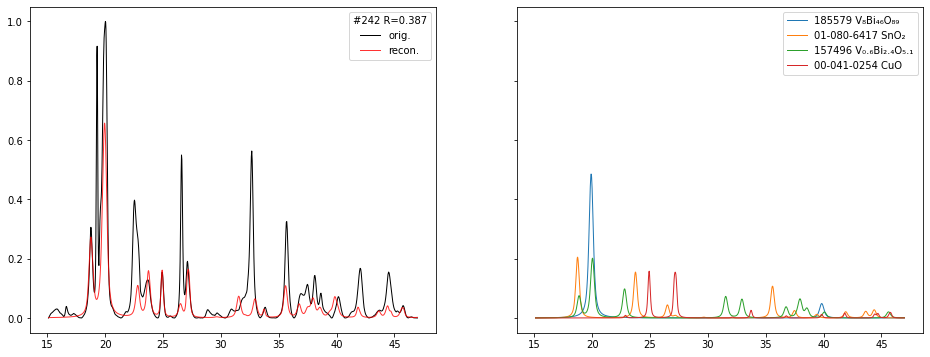

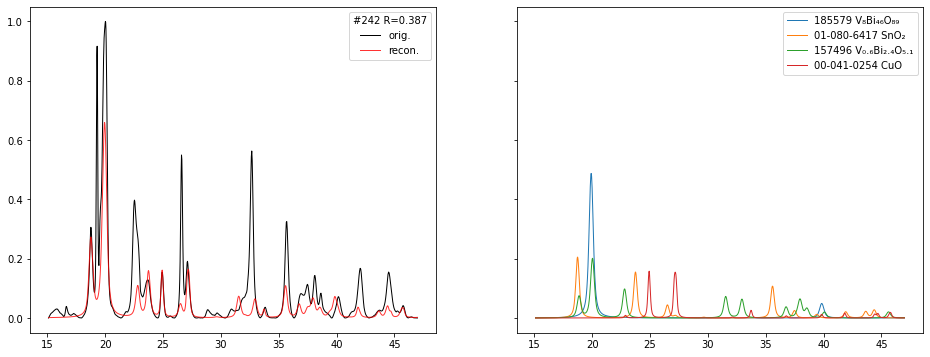

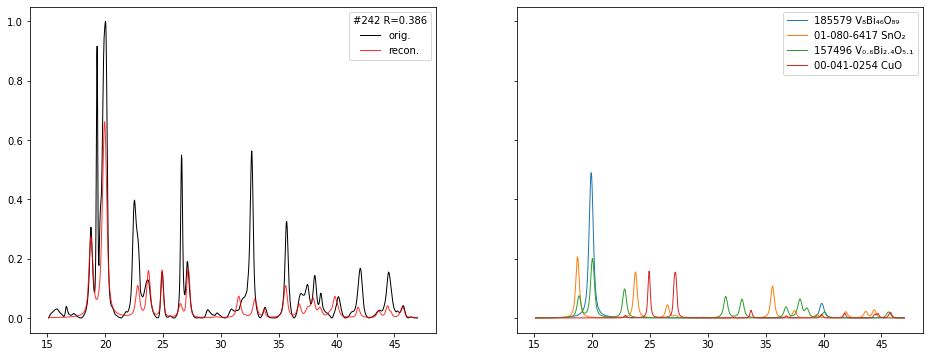

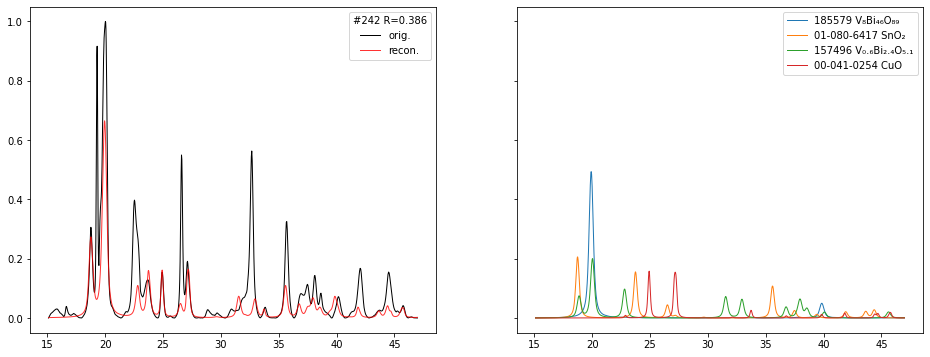

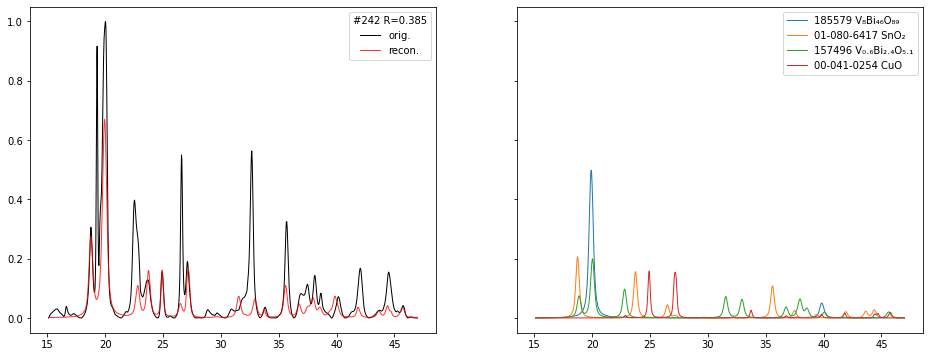

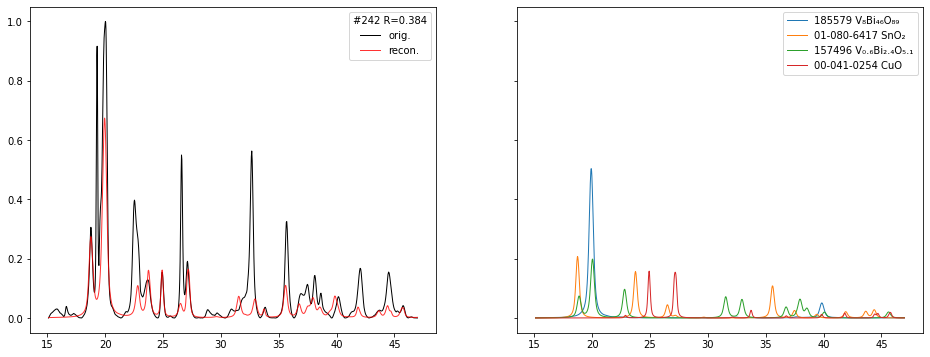

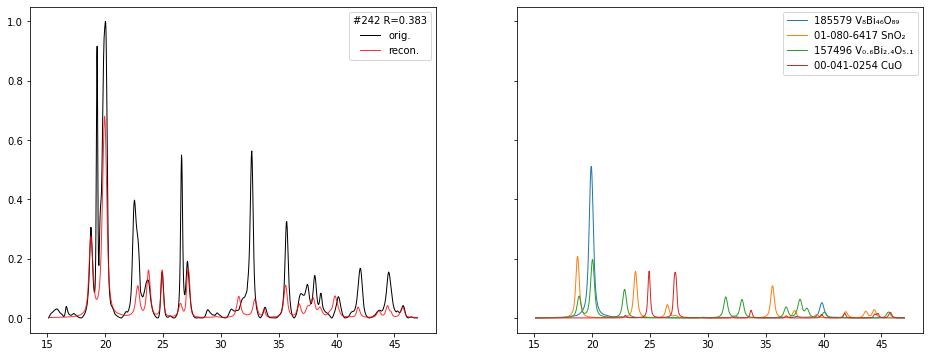

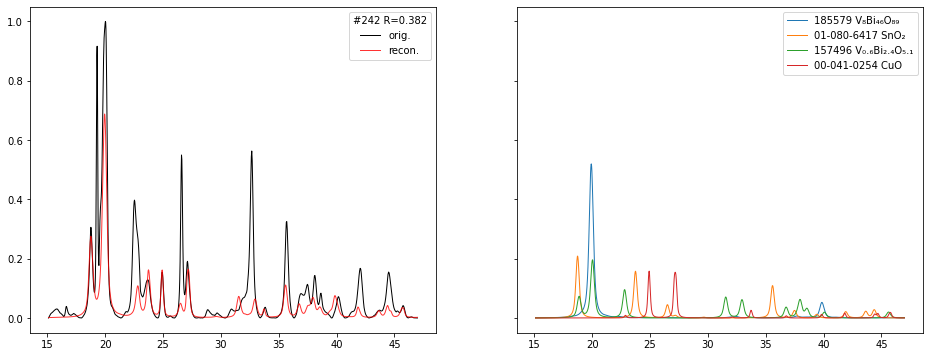

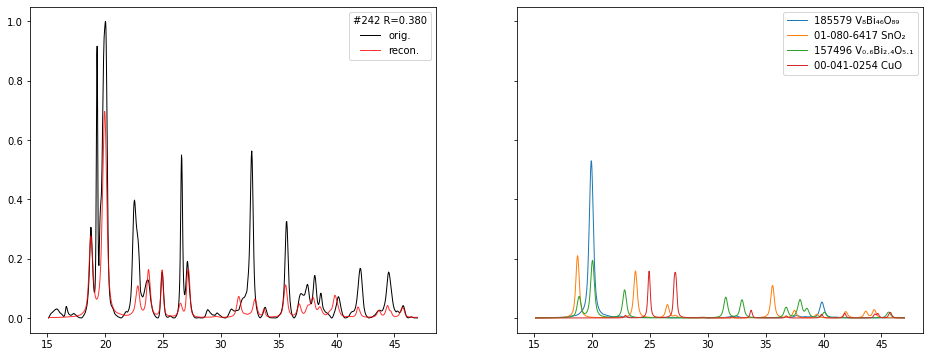

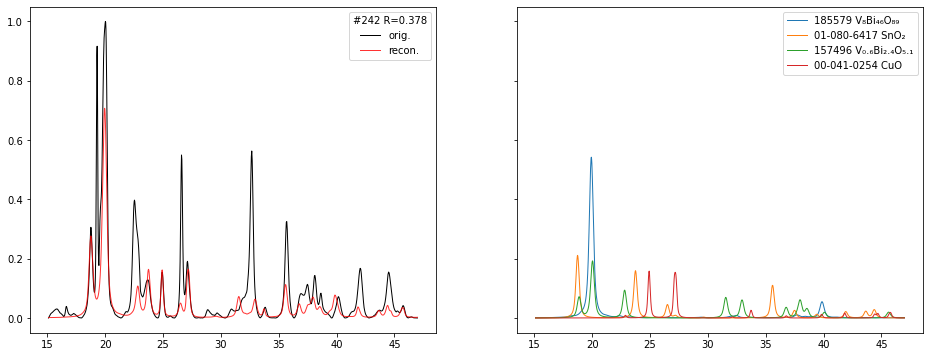

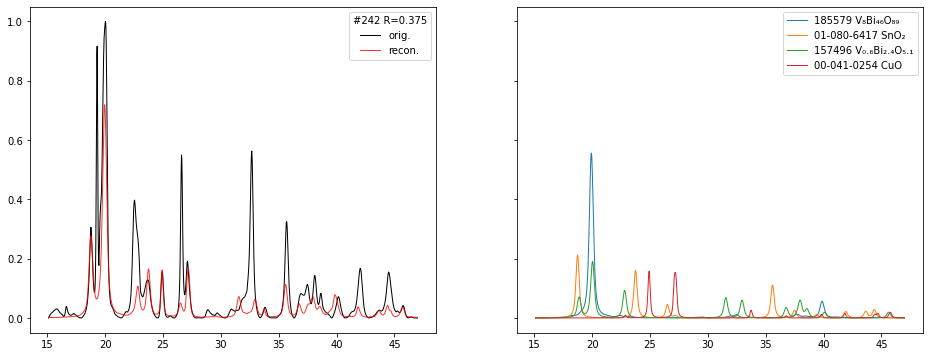

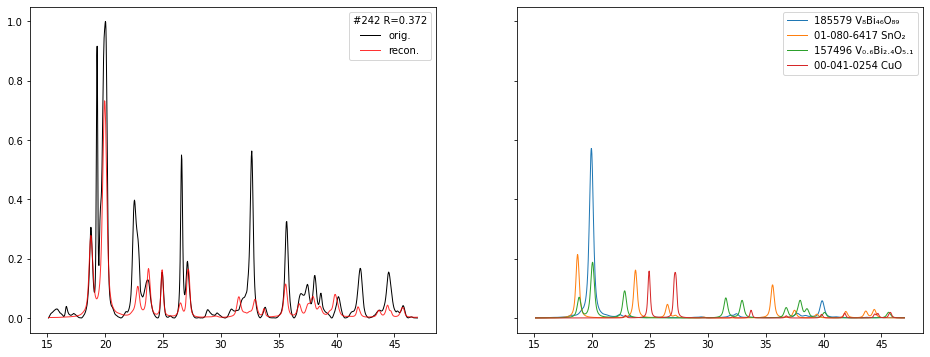

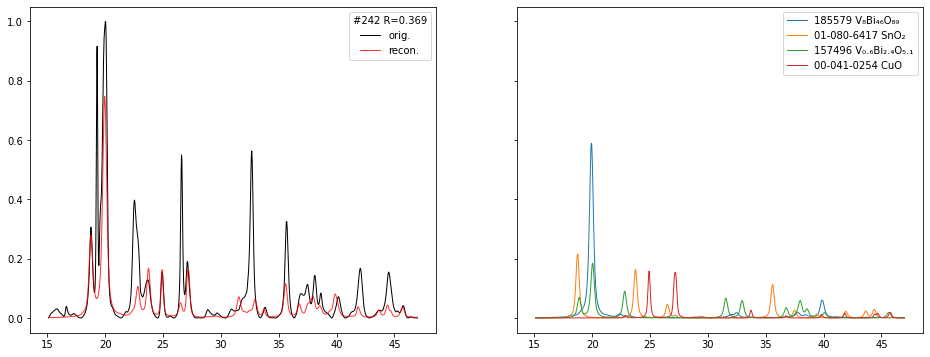

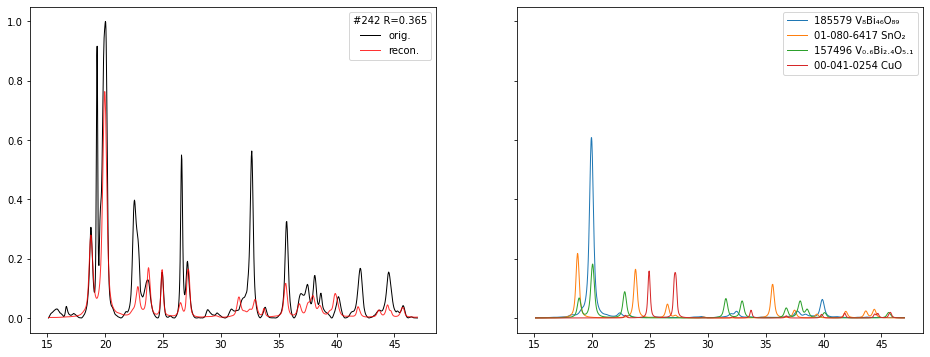

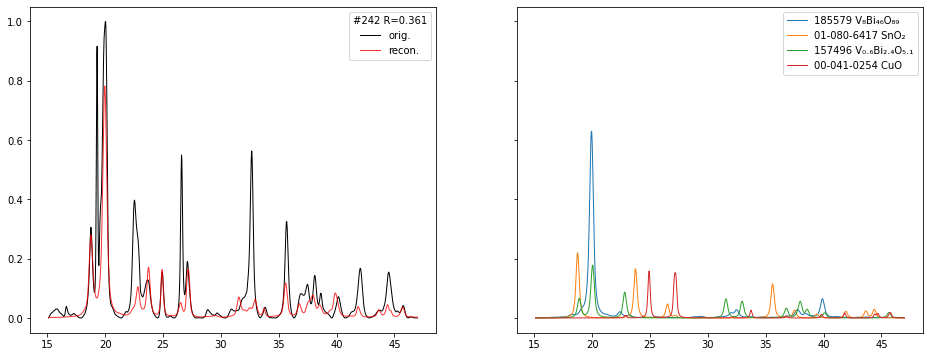

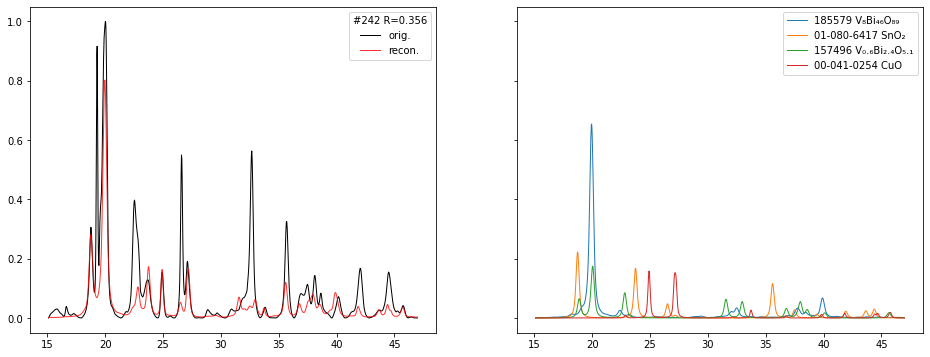

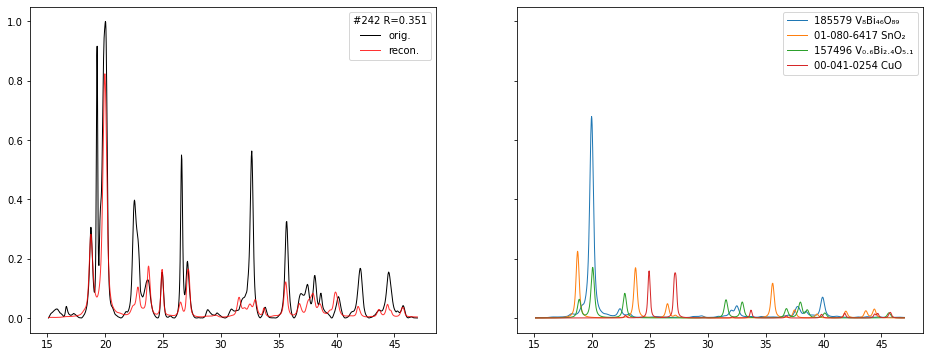

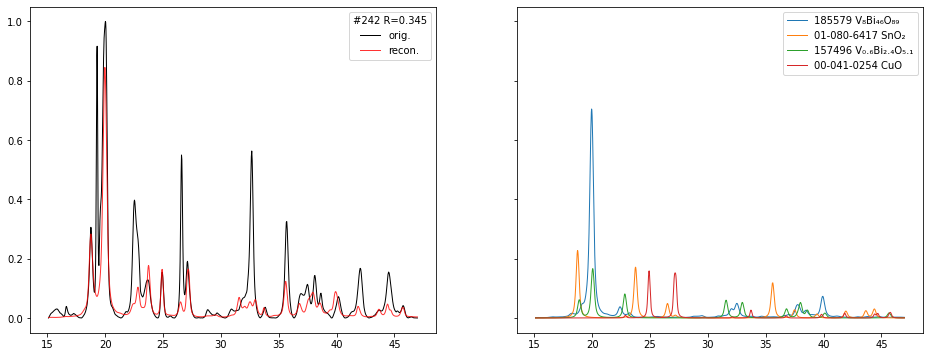

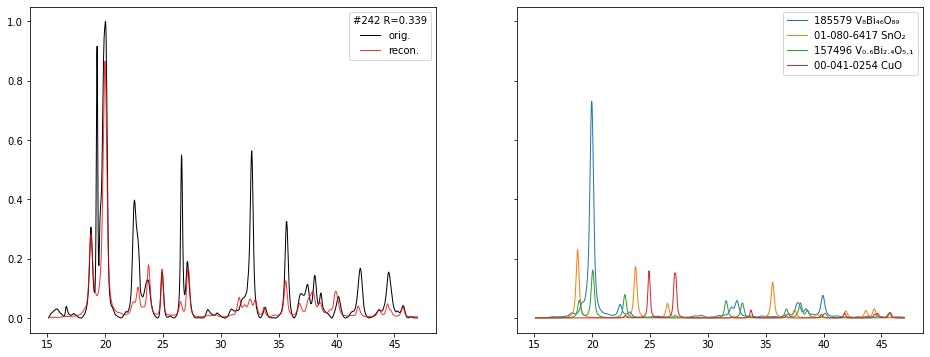

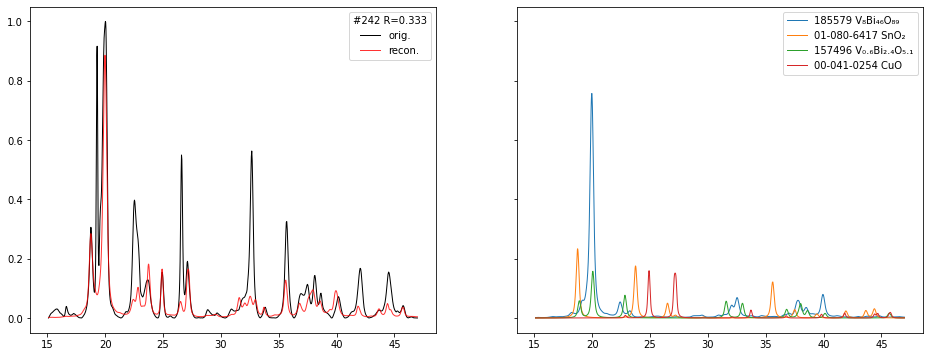

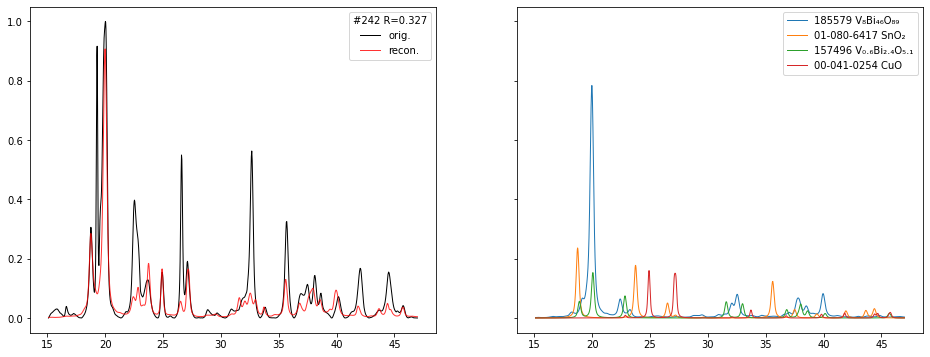

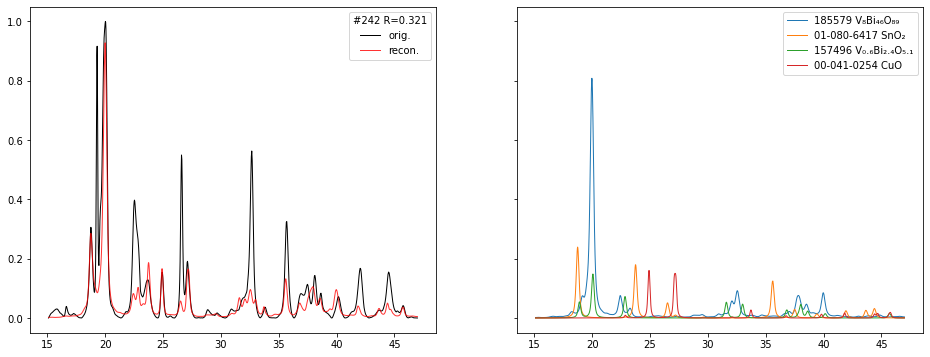

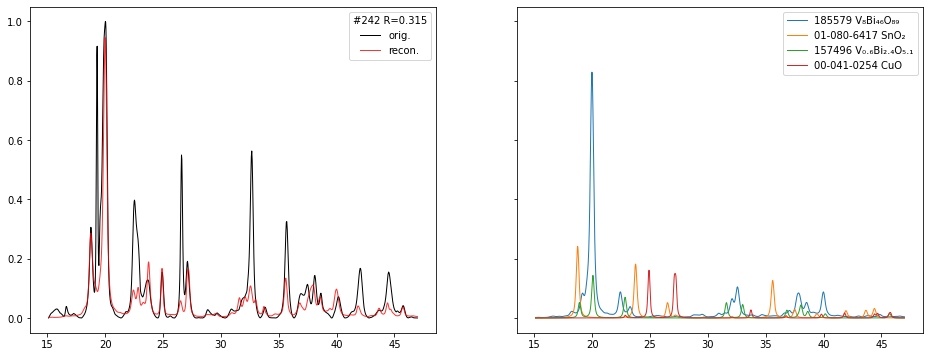

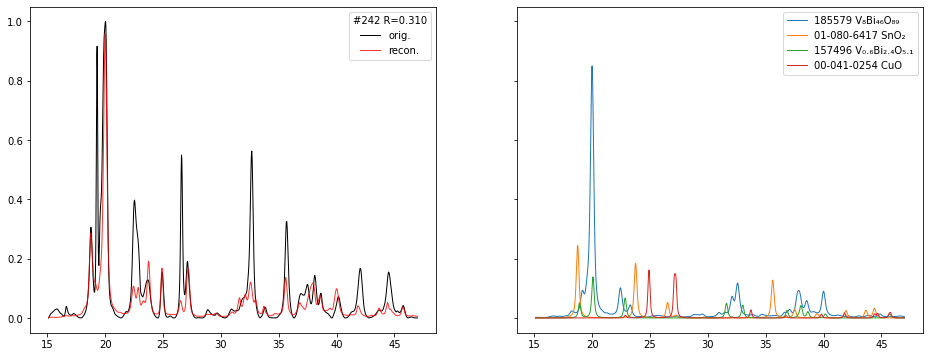

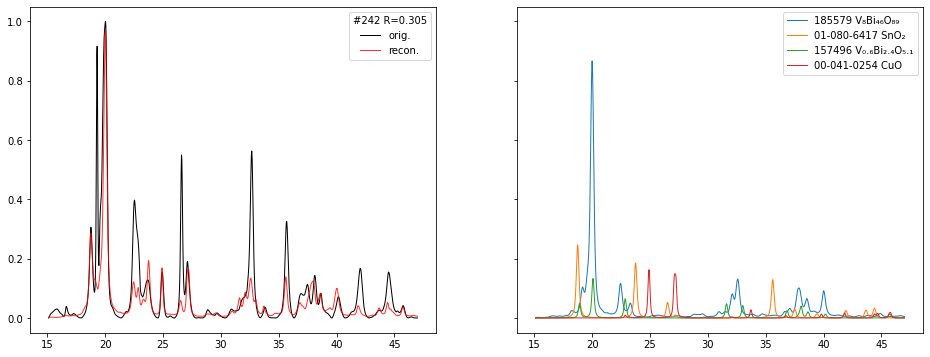

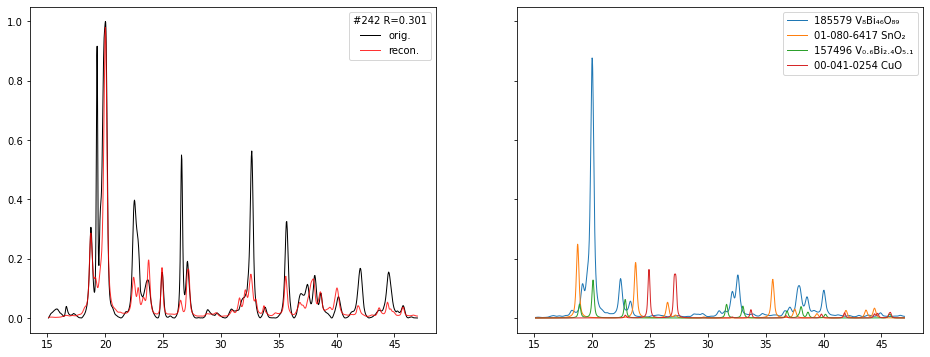

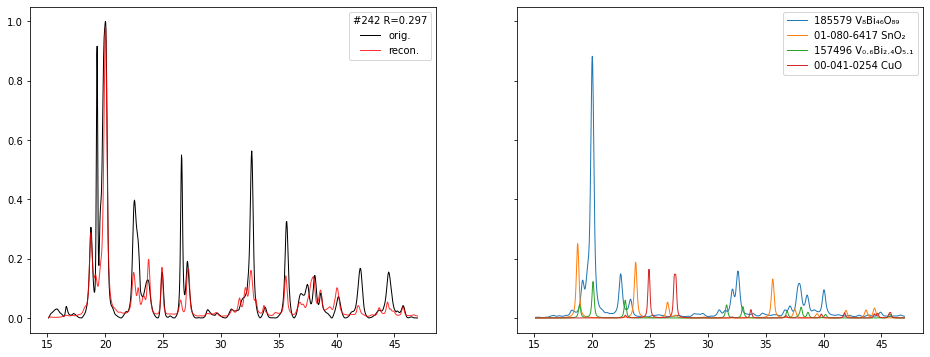

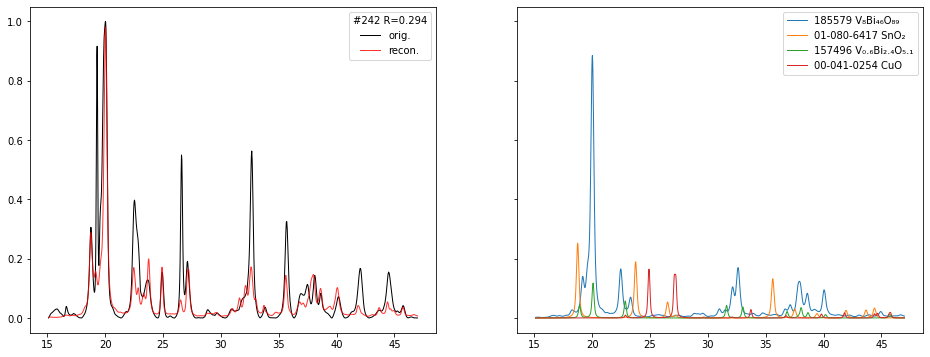

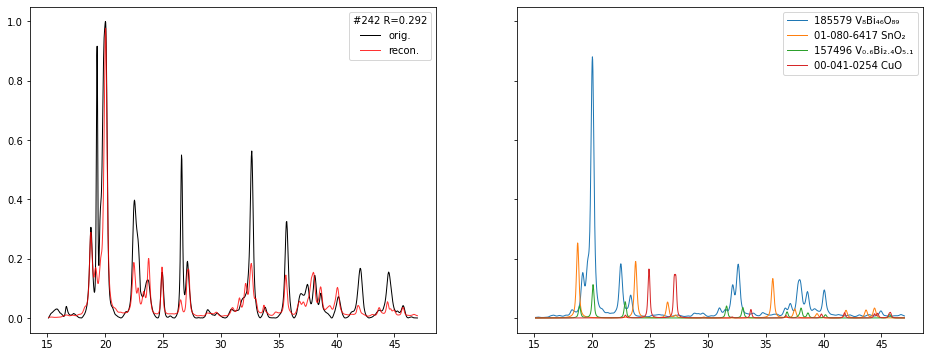

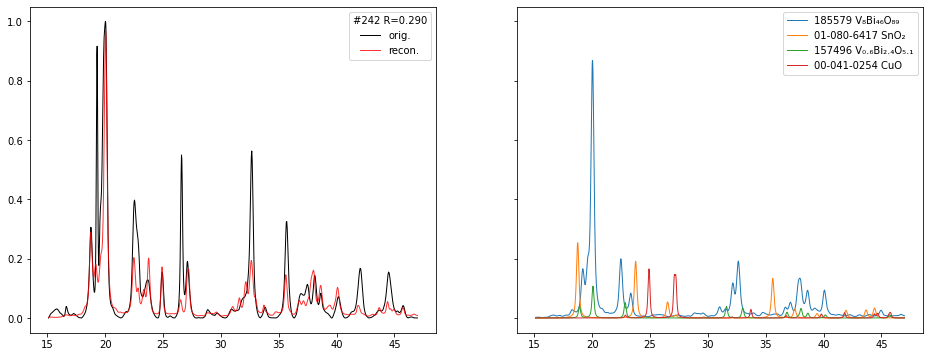

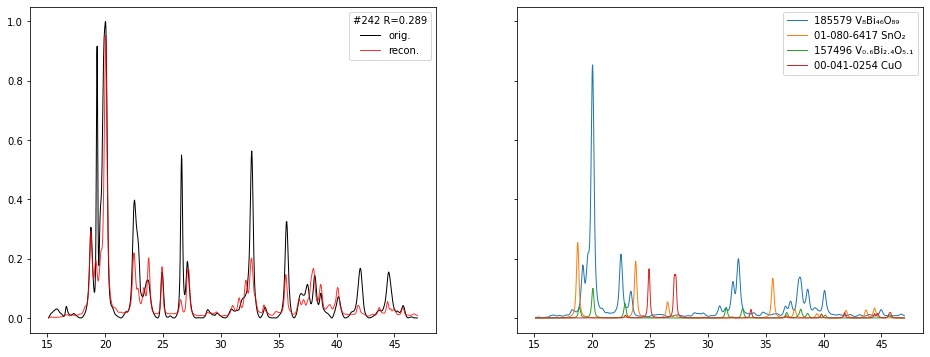

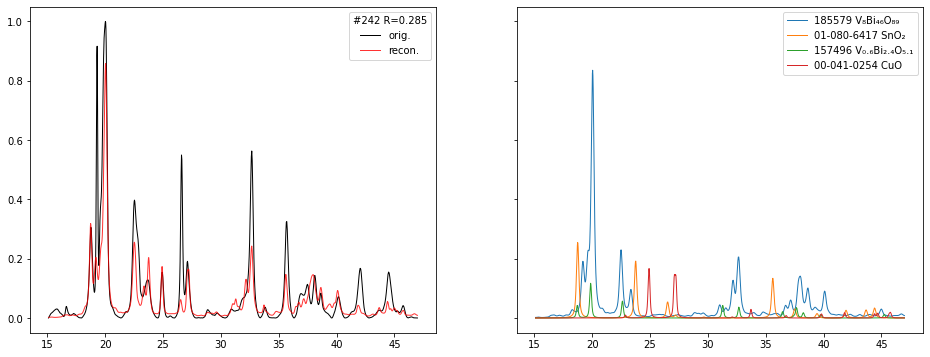

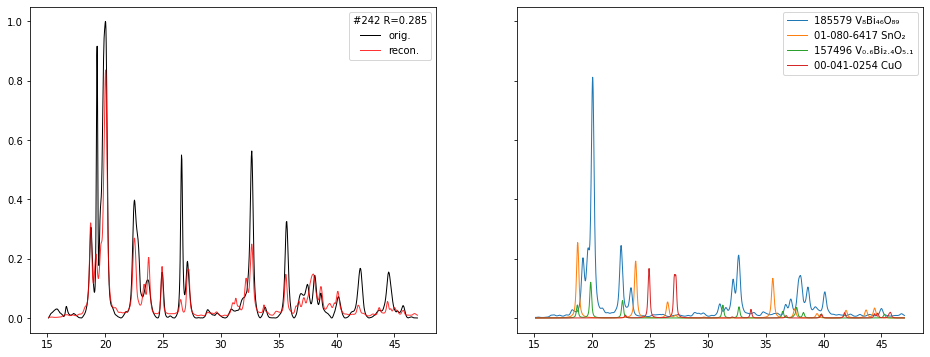

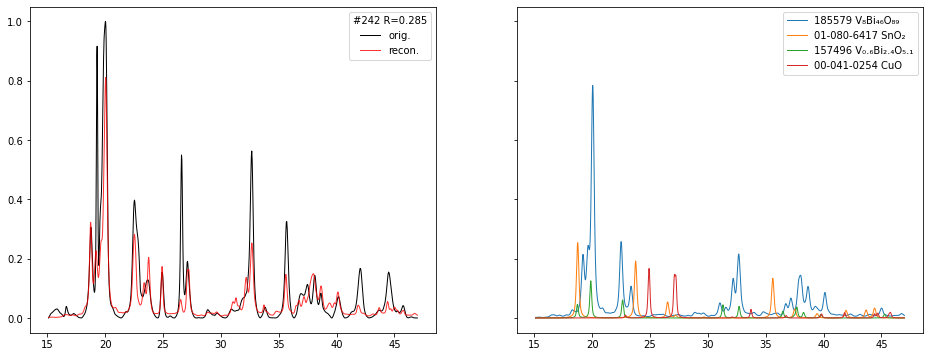

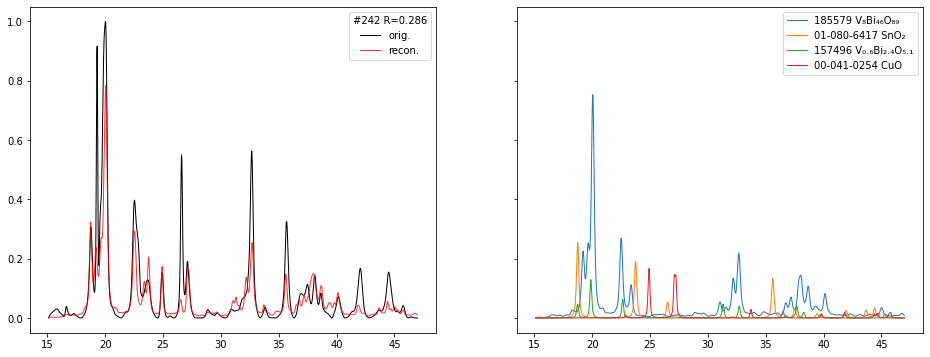

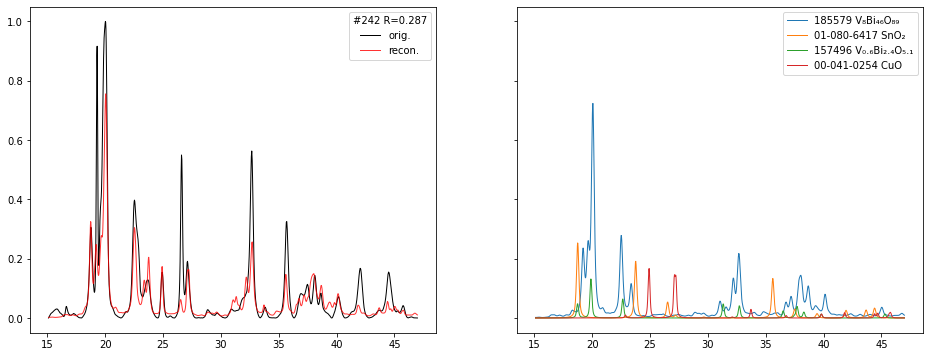

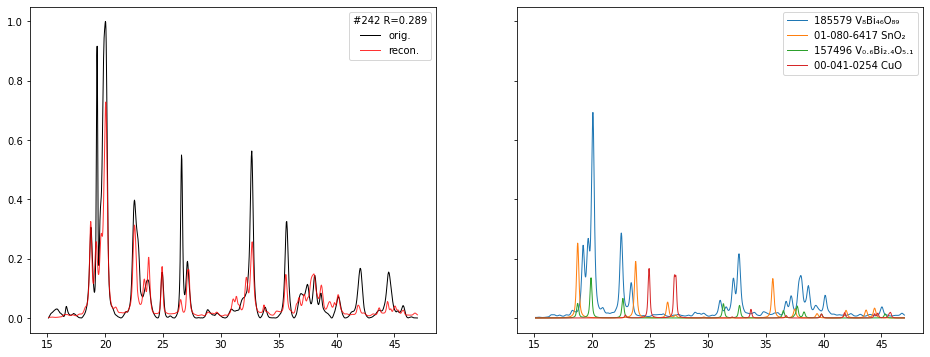

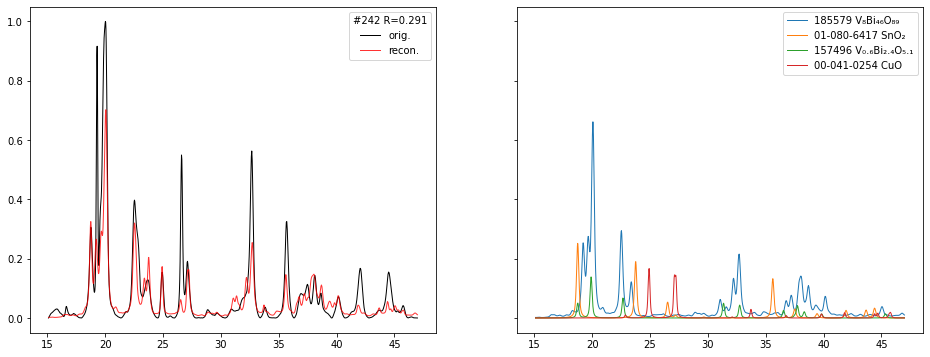

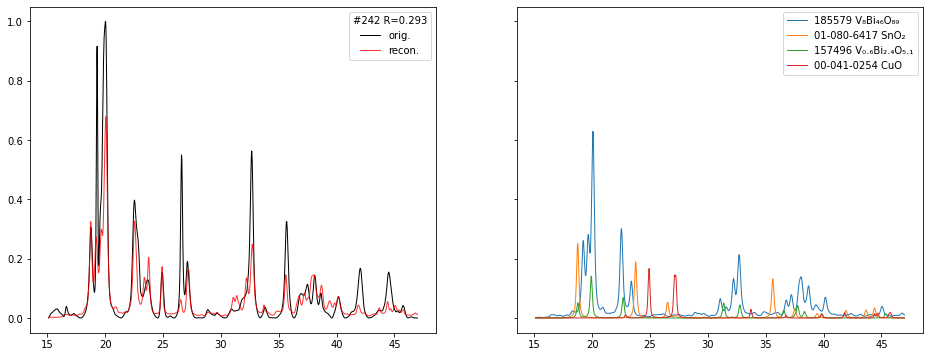

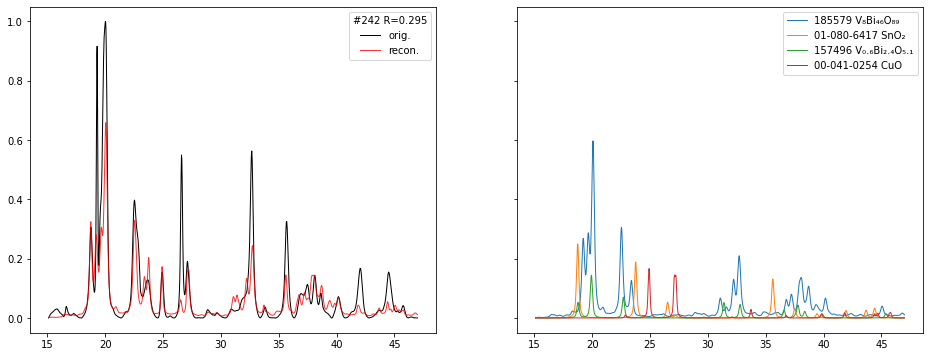

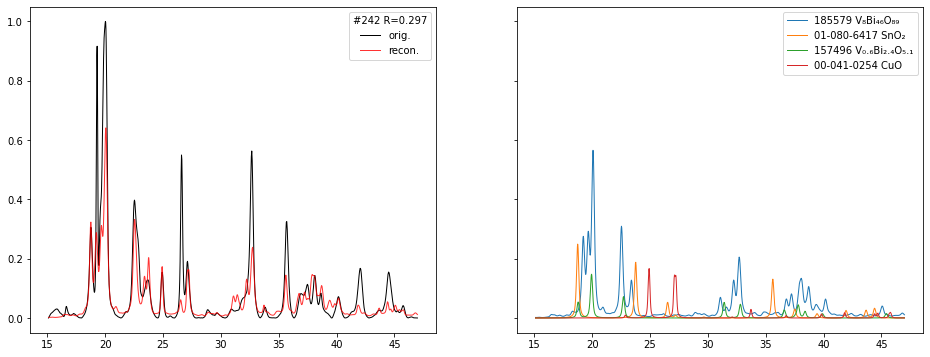

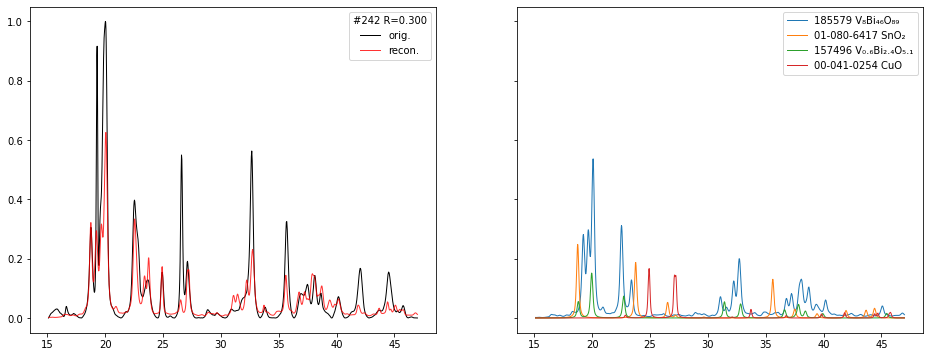

In [29]:
for i in range(len(texture_groups['V8Bi46O89_[3, 3, 1]'])):  
    new_sample = deepcopy(samples[242])
    new_sample.solution[0].entry.data['xrd'] =  texture_groups['V8Bi46O89_[3, 3, 1]'][i].data['xrd']
                # new_sample = new_sample.optimize(num_epoch=50, print_prog=True, loss_weight=loss_weight)
                # new_sample.update_solution(0.001, 0.2999, new_sample.max_q_shift)
    new_sample.refine_all_fractions()
    new_sample.refine_one_by_one()
    new_sample.plot(perphase=True)

In [35]:
samples[242].solution[0].entry.data['xrd'][0][50:100]

array([16.667437, 16.671345, 16.727444, 16.748647, 16.851849, 16.877271,
       16.949425, 17.134252, 17.134559, 17.226448, 17.288965, 17.34035 ,
       17.363268, 17.689377, 17.84423 , 17.874857, 18.220466, 18.293229,
       18.352177, 18.422192, 18.449898, 18.54258 , 18.788902, 18.846718,
       18.908712, 18.953002, 18.977038, 18.990272, 18.991957, 19.032313,
       19.139051, 19.155692, 19.159955, 19.27607 , 19.290505, 19.293841,
       19.453351, 19.586203, 19.688035, 19.708269, 19.709932, 19.767998,
       19.930878, 19.999233, 20.056789, 20.182973, 20.206943, 20.69802 ,
       20.78291 , 20.863222])

In [39]:
samples[242].solution[0].entry.data['xrd'][1][80:100]

array([0.008058, 0.501714, 0.023327, 0.000659, 0.000113, 0.003797,
       0.016079, 0.514261, 0.000091, 0.002977, 0.000031, 0.00098 ,
       0.002131, 1.      , 0.000011, 0.011481, 0.000069, 0.006466,
       0.001199, 0.044905])

In [40]:
samples[242].solution[0].entry.hkl[80:100]

[[3, 3, 0],
 [0, 0, 6],
 [4, 0, 3],
 [6, 0, -1],
 [5, 1, -5],
 [0, 2, 5],
 [2, 0, 5],
 [6, 0, -4],
 [3, 3, -3],
 [3, 1, 4],
 [2, 2, 4],
 [1, 3, 3],
 [4, 2, -5],
 [3, 3, 1],
 [4, 2, 2],
 [1, 3, -4],
 [6, 0, 0],
 [6, 0, -5],
 [5, 1, 2],
 [2, 0, -7]]

In [ ]:
texture_groups = {}
new_samples = []

for i,sample in enumerate(samples[280:]):  
    sample_copy = deepcopy(sample)
    print(i+280)
    for index, solution in enumerate(sample.solution):
        if solution.entry.structure:
            sample_texture = Texture(sample_copy,TC_cutoff=1.1,fraction_cutoff=0.0,solution=solution,solution_index=index)
    
            if sample_texture.preferred_orientation:
                print(sample_texture.entry.name)
                print(sample_texture.preferred_orientation)
                print(index)
                if f'{sample_texture.entry.chemical_formula}_{sample_texture.preferred_orientation}' in texture_groups.keys():
                    texture_group_one = texture_groups[f'{sample_texture.entry.chemical_formula}_{sample_texture.preferred_orientation}']
                else:
                    texture_group_one = sample_texture.get_texture_group()
                    texture_groups[f'{sample_texture.entry.chemical_formula}_{sample_texture.preferred_orientation}'] = texture_group_one
                                  
                sample_dup = sample_texture.optimize_by_texture(texture_group_one,plot=True) 
                sample_copy = deepcopy(sample_dup)
    
           
            
    new_samples.append(sample_copy)
    solution_file = f'solution/samples{i+280}.json'    
    with open(solution_file, 'w') as f:
        json.dump(new_samples[i], f, cls=MontyEncoder)